##**Start**

In [ ]:
# ! pip install seaborn
# ! pip install matplotlib
# ! pip install plotly
# ! pip install plotly_express
# ! pip install scikit-learn

In [ ]:
# ! pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from math import radians, cos, sin, asin, sqrt
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt


In [ ]:
# ! pip install k-means-constrained

1. If we are considering the dynamics packages to be delivered on time. Then we have to condsider some space for the most probablistic location where we could have the orders in future.
2. When is the static custumer used to buy the product. What is the average time between the order and delivery of order.


In [ ]:
import pandas as pd
import numpy as np


**We need to solve for the static problem first.**
lets see what we have to do.

**We also need to preprocess the data **

1. **Distance Calculation:** Calculate the distance between the Origin and Destination points for precise we would consider the real distance between the points
2. **Weight calculation:** Converting weight unit KG into the pounds
3.


In [ ]:
# ! pip install openpyxl

In [ ]:
df_rd = pd.read_excel("/content/freight_opt.XLSX")
df_rd.shape

(443, 34)

<div class="alert alert-block alert-danger">
<b>Preprocessing City🏙️</b>
</div>

In [ ]:
#capitalisation and removin the space between them
def parser(x):
    # Check if input is a string before applying string methods
    if isinstance(x, str):
        x=x.upper()
        x=x.strip()
        return x
    else:
        # Handle non-string inputs (e.g., NaN) - return as is or convert to string like 'UNKNOWN'
        return x


<div class="alert alert-block alert-info">
<b>Data Ingestion💉</b>
</div>

## Main File Ⓜ️

In [ ]:
# df_rd = pd.read_excel(r"C:\Users\sm.sankar\Desktop\Freight OP\21-May-25 1.XLSX")
df_rd["City"]=df_rd["City"].map(lambda x : parser(x))

In [ ]:
df_rd["City - State Province"] = df_rd["City"] + " " + df_rd["Region"]

In [ ]:
df_fp=pd.read_excel("/content/FPC_NA 1.xlsx")
fp_slice=df_fp[["ERPID","City - State Province"]].copy()
fp_spc=dict(fp_slice.values)

fp=df_fp[["ERPID","City"]].copy()
fp_c=dict(fp.values)

fp=df_fp[["ERPID","State_Province"]].copy()
fp_sp=dict(fp.values)


In [ ]:
df_rd["FPCity-State Province"]=df_rd["Plant"].map(lambda x : fp_spc.get(x))
df_rd["FPCity"]=df_rd["Plant"].map(lambda x : fp_c.get(x))

##**Location**🌐

In [ ]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sales Document         443 non-null    int64         
 1   Plant                  443 non-null    object        
 2   Collective no.         68 non-null     float64       
 3   Sales Org.             443 non-null    int64         
 4   Sales Doc. Type        443 non-null    object        
 5   Item                   443 non-null    int64         
 6   Item Category          443 non-null    object        
 7   RejectionReason        0 non-null      float64       
 8   Delivery               50 non-null     float64       
 9   Billing Doc.           0 non-null      float64       
 10  Ship to                443 non-null    int64         
 11  Ship-to name           443 non-null    object        
 12  Street                 443 non-null    object        
 13  City 

In [ ]:
df_l=pd.read_excel(r"/content/Loc 3.xlsx")
df_loc=df_l[["City - State Province","Latitude","Longitude"]].copy()

In [ ]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City - State Province  4662 non-null   object 
 1   Latitude               4662 non-null   float64
 2   Longitude              4662 non-null   float64
dtypes: float64(2), object(1)
memory usage: 109.4+ KB


In [ ]:
df_loc_fp=df_l[["City - State Province","Latitude","Longitude"]].copy()
df_loc_fp.rename(columns={"City - State Province":"FPCity-State Province"}, inplace=True)

In [ ]:
df_rd.loc[df_rd["Region"].isnull()]["City"].unique()

array([], dtype=object)

In [ ]:
df_rd["FPCity-State Province"]=df_rd["FPCity-State Province"].map(lambda x : parser(x))
df_rd["City - State Province"]=df_rd["City - State Province"].map(lambda x : parser(x))

In [ ]:
lc_lat=dict(df_loc[["City - State Province","Latitude"]].values)
lc_lon=dict(df_loc[["City - State Province","Longitude"]].values)


In [ ]:
df_rd["Lati_Des"]=df_rd["City - State Province"].map(lambda x : lc_lat.get(x))
df_rd["Longi_Des"]=df_rd["City - State Province"].map(lambda x : lc_lon.get(x))



In [ ]:
lc_lat=dict(df_loc_fp[["FPCity-State Province","Latitude"]].values)
lc_lon=dict(df_loc_fp[["FPCity-State Province","Longitude"]].values)


In [ ]:
df_rd["Lati_OC"]=df_rd["FPCity-State Province"].map(lambda x : lc_lat.get(x))
df_rd["Longi_OC"]=df_rd["FPCity-State Province"].map(lambda x : lc_lon.get(x))



In [ ]:
df_final=df_rd.copy()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sales Document         443 non-null    int64         
 1   Plant                  443 non-null    object        
 2   Collective no.         68 non-null     float64       
 3   Sales Org.             443 non-null    int64         
 4   Sales Doc. Type        443 non-null    object        
 5   Item                   443 non-null    int64         
 6   Item Category          443 non-null    object        
 7   RejectionReason        0 non-null      float64       
 8   Delivery               50 non-null     float64       
 9   Billing Doc.           0 non-null      float64       
 10  Ship to                443 non-null    int64         
 11  Ship-to name           443 non-null    object        
 12  Street                 443 non-null    object        
 13  City 

##**Unit Conversion**

In [ ]:
def WeightCalculation(x):
    if x["Unit of Weight"] in ["LB","TT"]:
        return x["Gross Weight"]
    elif x["Unit of Weight"]=="KG":
        return 2.204*x["Gross Weight"]
    else:
        pass


df_final["Weight_Updated (Lb)"]=df_final.apply(lambda x : WeightCalculation(x),axis=1)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sales Document         443 non-null    int64         
 1   Plant                  443 non-null    object        
 2   Collective no.         68 non-null     float64       
 3   Sales Org.             443 non-null    int64         
 4   Sales Doc. Type        443 non-null    object        
 5   Item                   443 non-null    int64         
 6   Item Category          443 non-null    object        
 7   RejectionReason        0 non-null      float64       
 8   Delivery               50 non-null     float64       
 9   Billing Doc.           0 non-null      float64       
 10  Ship to                443 non-null    int64         
 11  Ship-to name           443 non-null    object        
 12  Street                 443 non-null    object        
 13  City 


##**Haversine Distance**


In [ ]:
def haversine(lonlat1, lonlat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3963.1906          # 6371
    return c * r



In [ ]:
loc=df_l[["Country","City - State Province","Latitude","Longitude"]].copy()
loc.shape

(4662, 4)

In [ ]:
loc.drop_duplicates(inplace=True,subset=["City - State Province"])
loc.shape

(2955, 4)

In [ ]:
loc.drop_duplicates(inplace=True)
loc.shape

(2955, 4)

In [ ]:
loc.reset_index(drop=True,inplace=True)
loc[loc["City - State Province"] == "KINGSLEY FALLS QC"]

,Country,City - State Province,Latitude,Longitude
1354,Canada,KINGSLEY FALLS QC,45.861562,-72.088014


In [ ]:
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2955 non-null   object 
 1   City - State Province  2955 non-null   object 
 2   Latitude               2955 non-null   float64
 3   Longitude              2955 non-null   float64
dtypes: float64(2), object(2)
memory usage: 92.5+ KB


##**Distance Matrix**

In [ ]:
from scipy.spatial.distance import pdist, squareform
distance_matrix = squareform(pdist(loc[["Latitude","Longitude"]], (lambda u,v: haversine(u,v))))

In [ ]:
type(distance_matrix)

numpy.ndarray

In [ ]:
# Distance Matrix is made
dm = pd.DataFrame(distance_matrix,index=loc["City - State Province"].values,columns=loc["City - State Province"].values)
dm.shape
d_mat = dm.to_dict()

In [ ]:
d_mat["MEMPHIS TN"][ "WICKLIFFE KY"]

137.915231995619

In [ ]:

# Select relevant columns
locations_for_dm = df_l[["City - State Province","Latitude","Longitude"]].copy()

# !!! Apply the parser function to the location names BEFORE dropping duplicates or building the matrix !!!
locations_for_dm["City - State Province"] = locations_for_dm["City - State Province"].map(lambda x : parser(x))


# Drop duplicates based on the *parsed* location name
locations_for_dm.drop_duplicates(subset=["City - State Province"], inplace=True)

# Drop rows with missing essential data after parsing and dropping duplicates
locations_for_dm.dropna(subset=["City - State Province","Latitude","Longitude"], inplace=True)

# Reset index
locations_for_dm.reset_index(drop=True, inplace=True)


# Check if 'KINGSLEY FALLS QC' is in the list *at this point*
# print(f"Is 'KINGSLEY FALLS QC' in locations_for_dm['City - State Province']? {'KINGSLEY FALLS QC' in locations_for_dm['City - State Province'].values}")
# print(f"Locations used for Distance Matrix ({len(locations_for_dm)}):")
# print(locations_for_dm['City - State Province'].head()) # Print first few to verify format


# Calculate the distance matrix
distance_matrix = squareform(pdist(locations_for_dm[["Latitude","Longitude"]], (lambda u,v: haversine(u,v))))

# Convert to DataFrame, using the *parsed* location names from locations_for_dm as index and columns
d_mat_comprehensive = pd.DataFrame(distance_matrix,
                                   index=locations_for_dm["City - State Province"].values,
                                   columns=locations_for_dm["City - State Province"].values)


In [ ]:
# d_mat=dm.drop_duplicates().copy()
# d_mat["MEMPHIS TN"]["WICKLIFFE KY"]

In [ ]:
# dmat=d.T.drop_duplicates().copy()
# dmat["MEMPHIS TN"]["WICKLIFFE KY"]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sales Document         443 non-null    int64         
 1   Plant                  443 non-null    object        
 2   Collective no.         68 non-null     float64       
 3   Sales Org.             443 non-null    int64         
 4   Sales Doc. Type        443 non-null    object        
 5   Item                   443 non-null    int64         
 6   Item Category          443 non-null    object        
 7   RejectionReason        0 non-null      float64       
 8   Delivery               50 non-null     float64       
 9   Billing Doc.           0 non-null      float64       
 10  Ship to                443 non-null    int64         
 11  Ship-to name           443 non-null    object        
 12  Street                 443 non-null    object        
 13  City 

##**Map**

In [ ]:
# Download the Natural Earth dataset (if not already downloaded)
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip -d data

--2025-08-22 17:51:17--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.187.169, 52.92.152.9, 52.92.239.73, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.187.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K   502KB/s    in 0.4s    

2025-08-22 17:51:18 (502 KB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: data/ne_110m_admin_0_countries.README.html  
 extracting: data/ne_110m_admin_0_countries.VERSION.txt  
 extracting: data/ne_110m_admin_0_countries.cpg  
  inflating: data/ne_110m_admin_0_countries.dbf  
  inflating: data/ne_110m_admin_0_countries.prj  
  inflating: data/ne_110m_admin_0_countries.shp  
  infla

Text(287.7474750262148, 0.5, 'Latitude')

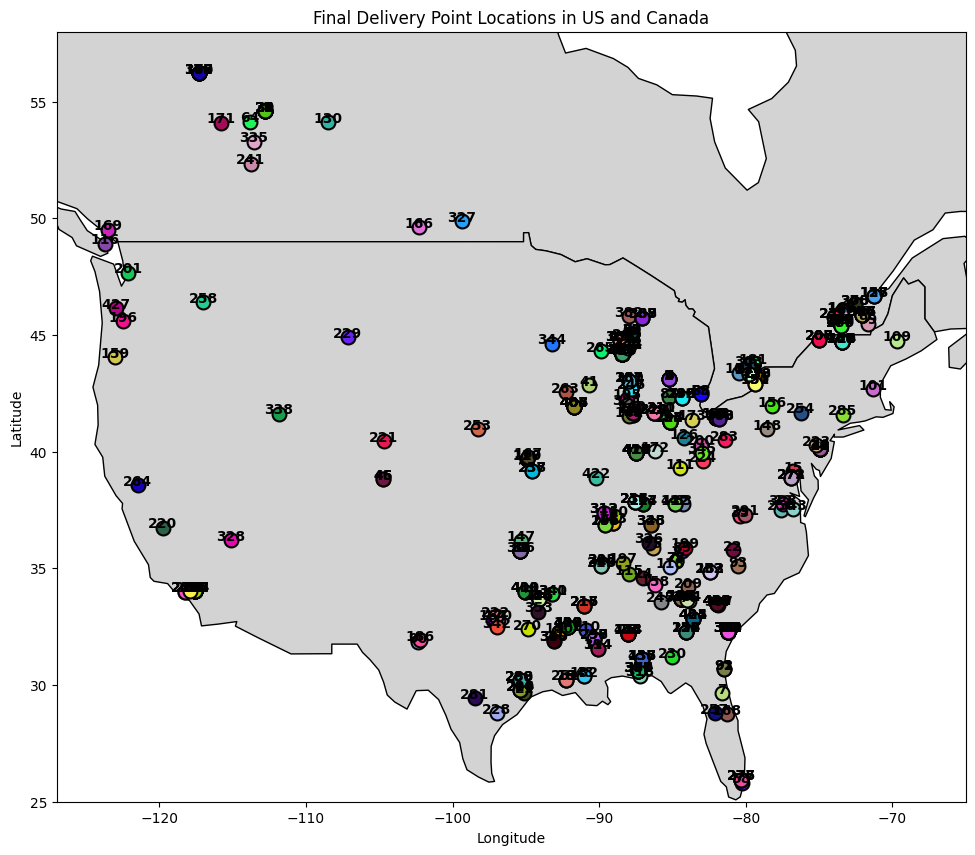

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import random

# Plotting
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")
fig, ax = plt.subplots(figsize=(15, 10))

# Filter for USA and Canada
north_america = world[world['NAME'].isin(['United States of America', 'Canada'])]
north_america.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot only final delivery points
for i, row in df_final.iterrows():
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    plt.plot(row['Longi_Des'], row['Lati_Des'],
             marker='o', markersize=10, color=color, markeredgecolor='black',
             markeredgewidth=1.5)  # Larger marker size, black outline
    plt.text(row['Longi_Des'], row['Lati_Des'], str(i + 1),
             fontsize=10, ha='center', color='black', fontweight='bold')

# Zoom in to the relevant region (adjust these values as needed)
plt.xlim([-127, -65])  # Longitude limits
plt.ylim([25, 58])    # Latitude limits

plt.title('Final Delivery Point Locations in US and Canada')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.show()

In [ ]:
df_final.describe()


,Sales Document,Collective no.,Sales Org.,Item,RejectionReason,Delivery,Billing Doc.,Ship to,Ord Crt Dt,Orig Req Dlvry Dt,...,Order quantity,Gross Weight,Gross Weight (KG),Weight,Net Value W/O Taxes,Lati_Des,Longi_Des,Lati_OC,Longi_OC,Weight_Updated (Lb)
count,4.430000e+02,68.000000,443.000000,443.000000,0.0,5.000000e+01,0.0,443.000000,443,443,...,443.000000,443.000000,443.000000,442.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,8.004256e+05,404747.073529,1031.523702,16.839729,NaN,8.041642e+07,NaN,178702.539503,2025-04-26 17:46:11.106094848,2025-06-04 06:46:19.232505600,...,26.178330,10462.020316,4919.546244,1791.380178,25058.715327,39.354598,-89.205425,36.758151,-90.065399,10845.552749
min,3.786000e+05,384976.000000,1030.000000,10.000000,NaN,8.041610e+07,NaN,100034.000000,2024-12-16 00:00:00,2025-01-07 00:00:00,...,1.000000,33.000000,14.969000,30.000000,0.000000,25.822320,-123.717000,35.100177,-123.007725,33.000000
25%,3.882545e+05,388524.000000,1030.000000,10.000000,NaN,8.041647e+07,NaN,200035.000000,2025-04-22 00:00:00,2025-05-23 00:00:00,...,1.000000,2230.000000,1052.560500,550.000000,2503.500000,33.683218,-91.910602,35.100177,-89.849886,2320.500000
50%,3.893310e+05,389458.000000,1030.000000,10.000000,NaN,8.041648e+07,NaN,201099.000000,2025-05-05 00:00:00,2025-05-30 00:00:00,...,3.000000,4662.000000,2182.685000,2250.000000,9802.000000,40.021550,-87.749272,35.100177,-89.849886,4812.000000
75%,3.897665e+05,443109.000000,1030.000000,20.000000,NaN,8.041649e+07,NaN,201455.000000,2025-05-13 00:00:00,2025-06-09 00:00:00,...,8.000000,13017.500000,6350.741500,2525.000000,26167.500000,44.202208,-81.987357,37.930900,-89.849886,14001.000000
max,3.000653e+07,443963.000000,1045.000000,110.000000,NaN,8.041661e+07,NaN,206887.000000,2025-05-19 00:00:00,2026-04-17 00:00:00,...,7913.000000,43795.000000,19865.062000,3325.000000,154294.000000,56.232953,-69.719497,53.559623,-79.745508,43795.000000
std,3.426163e+06,25336.420873,3.713891,14.842737,NaN,1.155761e+02,NaN,42447.432714,NaN,NaN,...,376.304022,13190.633830,6059.926056,952.828704,36652.411298,6.294398,11.720181,3.801490,5.537817,13359.684095


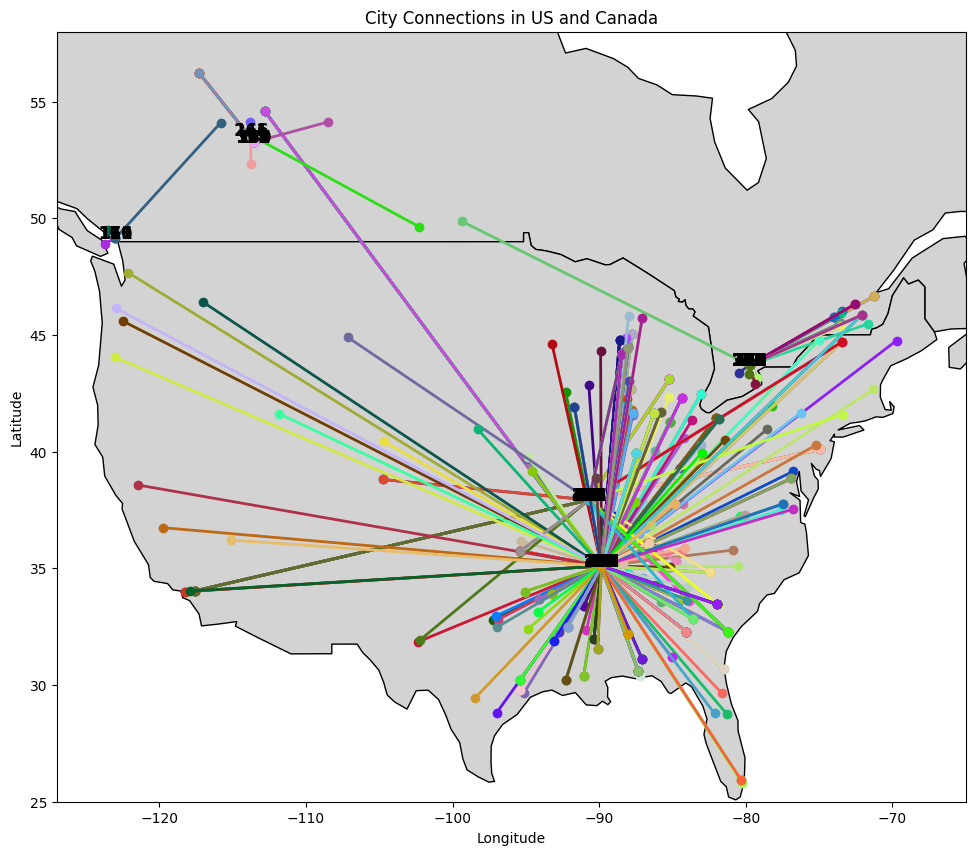

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import random

# # Plotting
world = gpd.read_file("data/ne_110m_admin_0_countries.shp") # This line reads the shapefile you downloaded.
fig, ax = plt.subplots(figsize=(15, 10))

# Filter for USA and Canada
north_america = world[world['ADMIN'].isin(['United States of America', 'Canada'])]
north_america.plot(ax=ax, color='lightgrey', edgecolor='black') # Plot these countries

# Plot each route with a different color and label the starting point
for i, row in df_final.iterrows():
    color = "#%06x" % random.randint(0, 0xFFFFFF)  # Random color
    plt.plot([row['Longi_Des'], row['Longi_OC']],
             [row['Lati_Des'], row['Lati_OC']],
             color=color, linewidth=2, marker='o')
    plt.text(row['Longi_OC'], row['Lati_OC'], str(i+1),
             fontsize=12, ha='center', color='black', fontweight='bold')

# Zoom in to the relevant region (adjust these values as needed)
plt.xlim([-127, -65])  # Longitude limits
plt.ylim([25, 58])    # Latitude limits

plt.title('City Connections in US and Canada')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



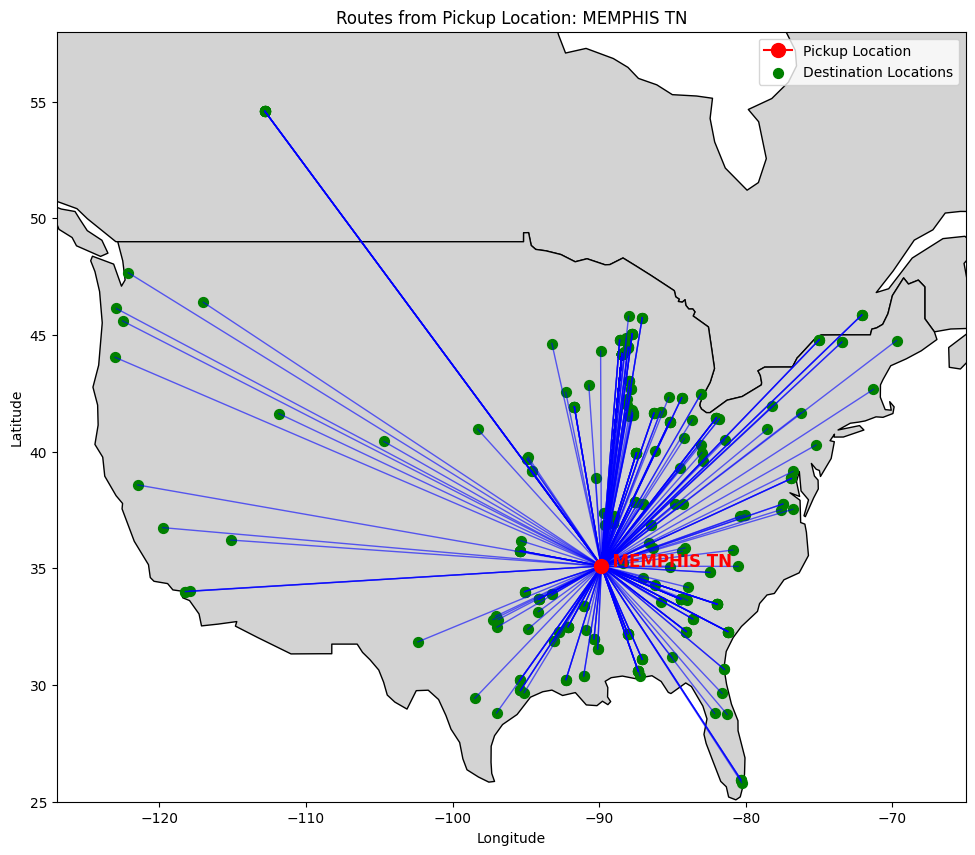

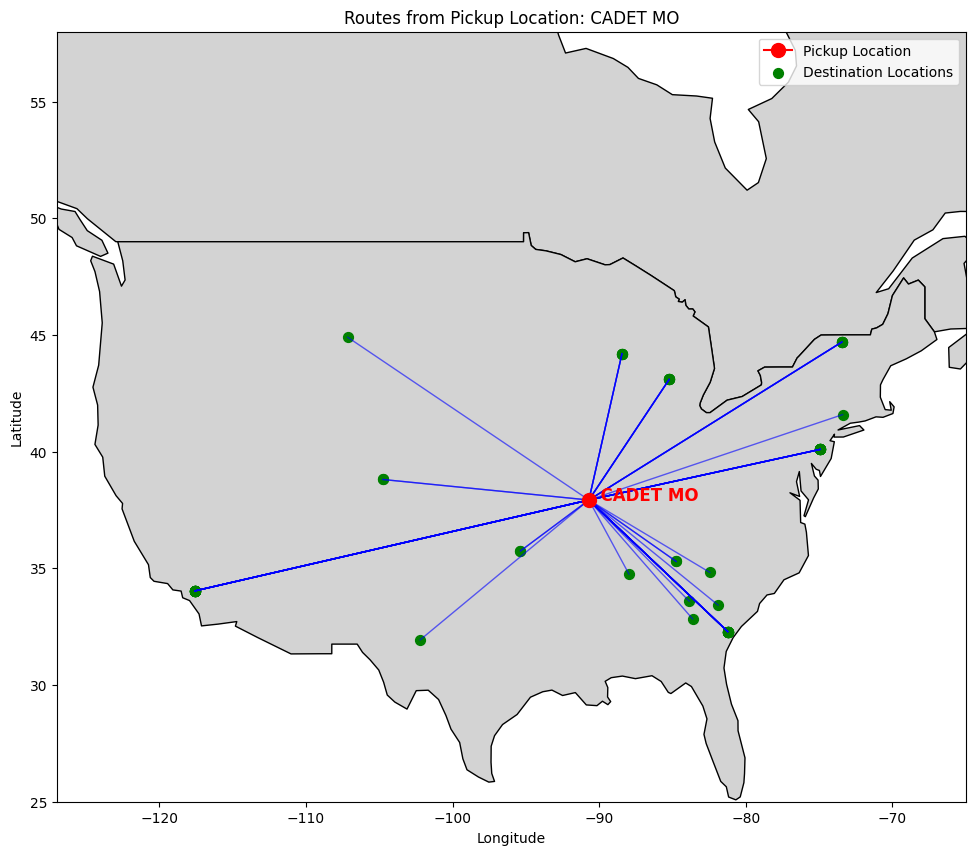

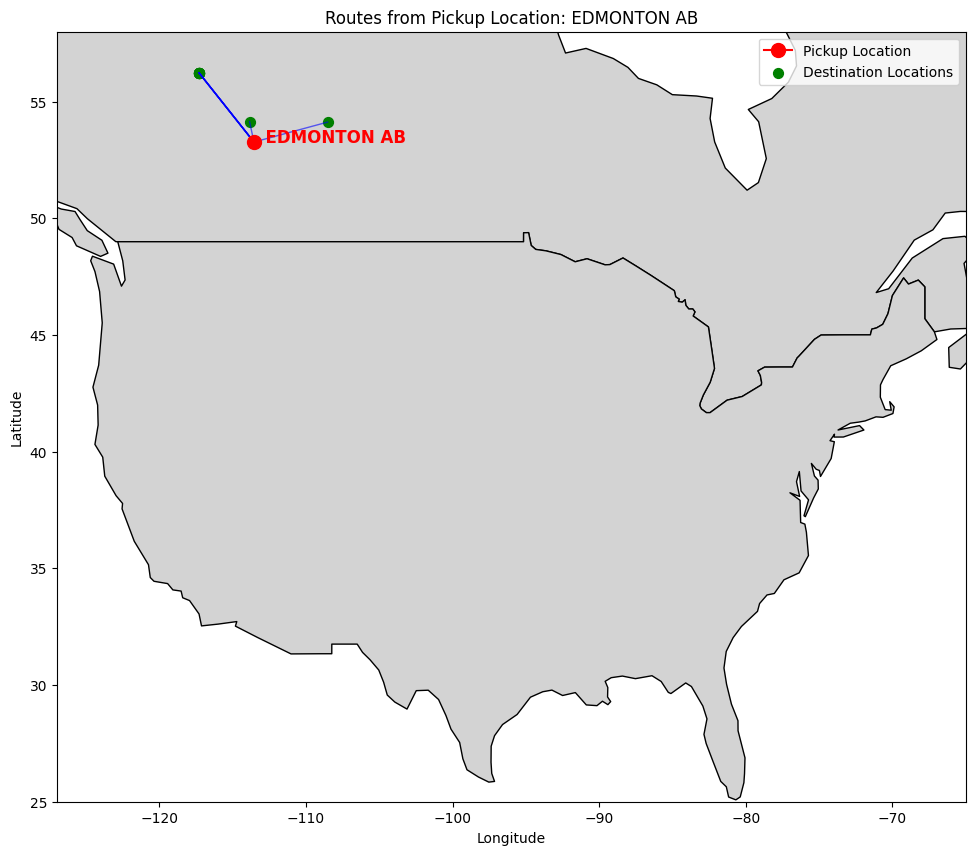

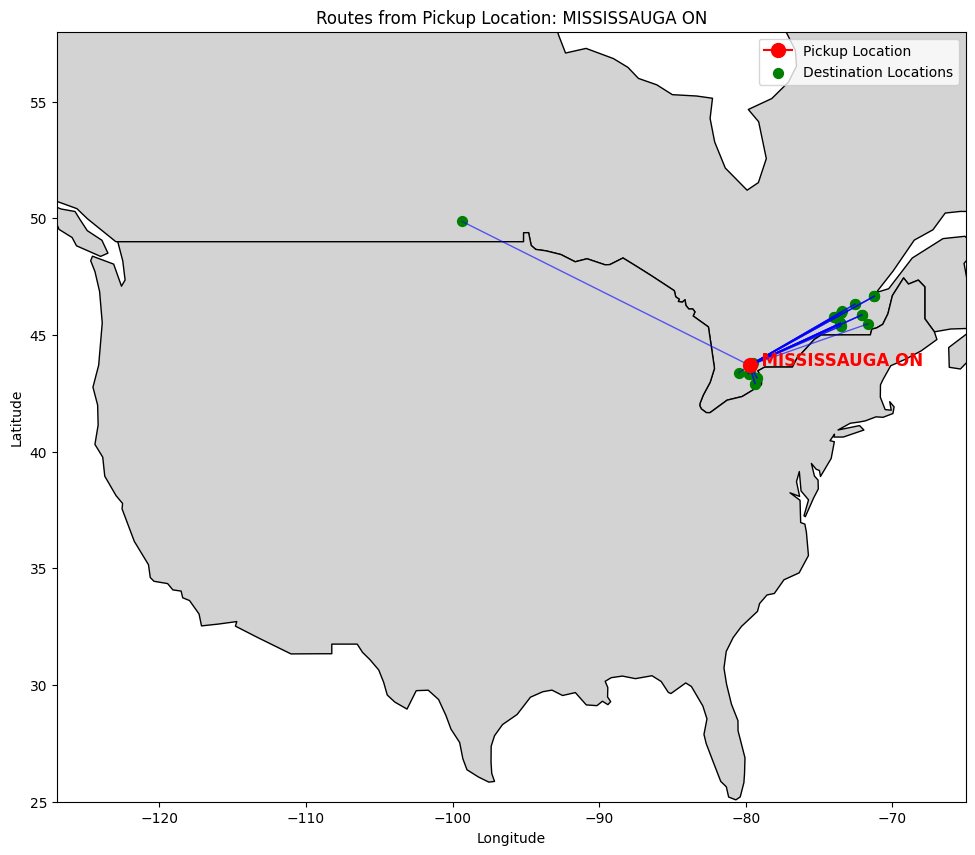

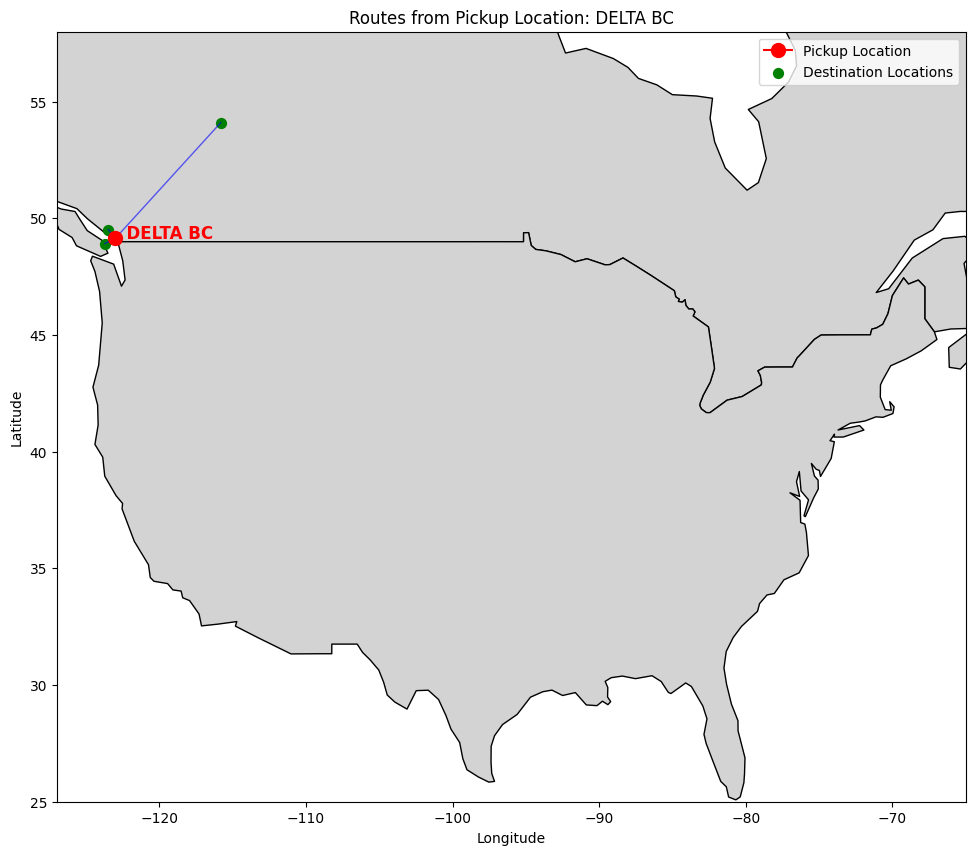

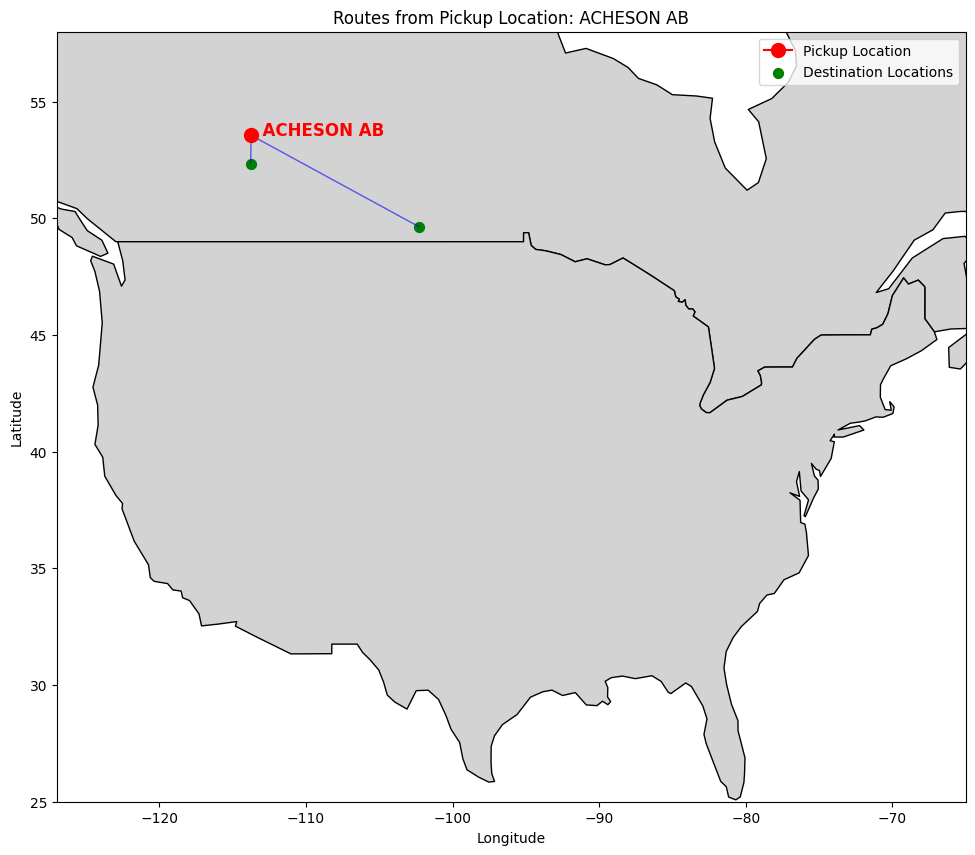

In [ ]:
# prompt: so according to the above code, now i want the one by one maps of the individual locations of the pick up location, which is providing products to the various city

import matplotlib.pyplot as plt
# Get unique pick-up locations
unique_pickup_locations = df_final[['FPCity-State Province', 'Lati_OC', 'Longi_OC']].drop_duplicates()

# Plot a map for each unique pick-up location
for index, pickup_row in unique_pickup_locations.iterrows():
    pickup_city = pickup_row['FPCity-State Province']
    pickup_lat = pickup_row['Lati_OC']
    pickup_lon = pickup_row['Longi_OC']

    # Filter the DataFrame to show only routes originating from this pick-up location
    routes_from_pickup = df_final[df_final['FPCity-State Province'] == pickup_city].copy()

    fig, ax = plt.subplots(figsize=(15, 10))

    # Plot North America as background
    north_america.plot(ax=ax, color='lightgrey', edgecolor='black')

    # Plot routes from the current pick-up location
    for i, row in routes_from_pickup.iterrows():
        plt.plot([row['Longi_OC'], row['Longi_Des']],
                 [row['Lati_OC'], row['Lati_Des']],
                 color='blue', linewidth=1, alpha=0.6) # Use a consistent color for routes from this pickup

    # Plot the pick-up location as a larger, distinct marker
    plt.plot(pickup_lon, pickup_lat, marker='o', color='red', markersize=10, label='Pickup Location')
    plt.text(pickup_lon, pickup_lat, f'  {pickup_city}', fontsize=12, ha='left', color='red', fontweight='bold')


    # Plot the destination locations
    plt.scatter(routes_from_pickup['Longi_Des'], routes_from_pickup['Lati_Des'], color='green', s=50, label='Destination Locations')


    # Zoom in to the relevant region (adjust these values as needed or dynamically based on the locations)
    # For simplicity, using the same zoom as before
    plt.xlim([-127, -65])  # Longitude limits
    plt.ylim([25, 58])    # Latitude limits


    plt.title(f'Routes from Pickup Location: {pickup_city}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()


1. what would happen if we make the clustering on the basis of the pick-up location, like there are 5-6 pick up location that means there should be 5-6 clusters.
2. Its like we are considering each of the pick up location as an individual and then solving for each of them.
3. Its like we have converted them into 6 differnet problem.

##**KMEANS CLUSTERING**

Evaluating K-Means for different numbers of clusters...
  Trying k = 2...
    Silhouette Score: 0.6592
    Davies-Bouldin Index: 0.5986
    Calinski-Harabasz Index: 604.0233
--------------------
  Trying k = 3...
    Silhouette Score: 0.4350
    Davies-Bouldin Index: 0.8765
    Calinski-Harabasz Index: 577.3182
--------------------
  Trying k = 4...
    Silhouette Score: 0.5032
    Davies-Bouldin Index: 0.6922
    Calinski-Harabasz Index: 646.1973
--------------------
  Trying k = 5...
    Silhouette Score: 0.5148
    Davies-Bouldin Index: 0.6759
    Calinski-Harabasz Index: 710.3812
--------------------
  Trying k = 6...
    Silhouette Score: 0.5664
    Davies-Bouldin Index: 0.5512
    Calinski-Harabasz Index: 938.3707
--------------------
  Trying k = 7...
    Silhouette Score: 0.5724
    Davies-Bouldin Index: 0.5860
    Calinski-Harabasz Index: 905.7249
--------------------
  Trying k = 8...
    Silhouette Score: 0.5415
    Davies-Bouldin Index: 0.6358
    Calinski-Harabasz Index: 9

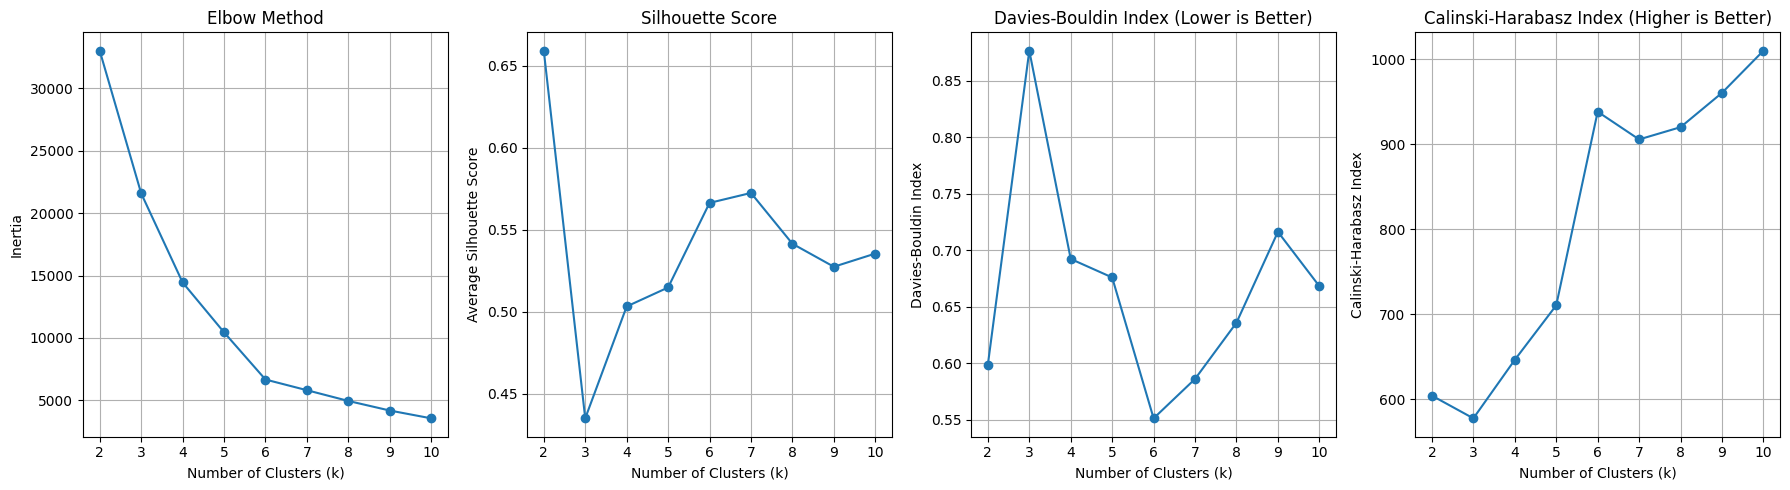


Analysis based on metrics:
- Elbow Method: Look for the 'elbow' point where the rate of decrease in inertia slows down.
- Silhouette Score: Higher score indicates better-defined clusters. Look for the peak.
- Davies-Bouldin Index: Lower score indicates better clustering. Look for the minimum.
- Calinski-Harabasz Index: Higher score indicates better clustering. Look for the peak.

Applying K-Means with chosen optimal k = 6

K-Means clustering completed for destination cities with k=6.
Added 'Destination_Cluster' column to df_final.

Destination clusters per pick-up location:
Destination_Cluster     0    1    2    3    4     5
FPCity-State Province                              
ACHESON AB              2    0    0    0    0     0
CADET MO                1   21  136  225  201   217
DELTA BC                3    0    0    0    0     0
EDMONTON AB            52    0    0    0    0     0
MEMPHIS TN             68  220   63   10  389  2416
MISSISSAUGA ON          0    0   98    0    0     1


<Figure size 1500x1000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Ensure required libraries are installed
# !pip install scikit-learn

# Select the relevant data for clustering: Latitude and Longitude of Destination cities
# Filter out rows with missing coordinates if any
clustering_data = df_final[['Lati_Des', 'Longi_Des']].dropna().copy()

if clustering_data.empty:
    print("No valid destination location data available for clustering.")
else:
    # Determine the optimal number of clusters (assuming you want to check a range)
    # You can adjust max_clusters based on your understanding of the data or problem.
    # Given the problem description suggests 6 pick-up locations, 6 is a reasonable starting point,
    # but let's explore a range around that.
    max_clusters = 10 # Let's check clusters from 2 up to 10
    # Initialize lists to store metrics
    inertia = []
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []

    print("Evaluating K-Means for different numbers of clusters...")

    # Loop starts from k=2 as metrics like silhouette are not defined for k=1
    for k in range(2, max_clusters + 1):
        print(f"  Trying k = {k}...")
        # Use n_init='auto' or an explicit integer value (like 10)
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(clustering_data)
        labels = kmeans.labels_
        inertia.append(kmeans.inertia_) # Append inertia for the current k

        # Calculate metrics for k > 1
        silhouette_avg = silhouette_score(clustering_data, labels)
        db_index = davies_bouldin_score(clustering_data, labels)
        ch_index = calinski_harabasz_score(clustering_data, labels)

        silhouette_scores.append(silhouette_avg)
        davies_bouldin_scores.append(db_index)
        calinski_harabasz_scores.append(ch_index)

        print(f"    Silhouette Score: {silhouette_avg:.4f}")
        print(f"    Davies-Bouldin Index: {db_index:.4f}")
        print(f"    Calinski-Harabasz Index: {ch_index:.4f}")
        print("-" * 20)


    # Plotting results for metrics
    plt.figure(figsize=(18, 5))

    # Elbow Method Plot
    plt.subplot(1, 4, 1)
    # Plot inertia against the corresponding k values (range(2, max_clusters + 1))
    plt.plot(range(2, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)

    # Silhouette Score Plot
    plt.subplot(1, 4, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Silhouette Score')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)

    # Davies-Bouldin Index Plot
    plt.subplot(1, 4, 3)
    plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
    plt.title('Davies-Bouldin Index (Lower is Better)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)

    # Calinski-Harabasz Index Plot
    plt.subplot(1, 4, 4)
    plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
    plt.title('Calinski-Harabasz Index (Higher is Better)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski-Harabasz Index')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print("\nAnalysis based on metrics:")
    print("- Elbow Method: Look for the 'elbow' point where the rate of decrease in inertia slows down.")
    print("- Silhouette Score: Higher score indicates better-defined clusters. Look for the peak.")
    print("- Davies-Bouldin Index: Lower score indicates better clustering. Look for the minimum.")
    print("- Calinski-Harabasz Index: Higher score indicates better clustering. Look for the peak.")

    # Based on the plots and metric values, choose an optimal k.
    # For example, if k=6 looks reasonable based on these metrics, you can run K-Means with k=6.
    # Let's choose k=6 as an example based on the problem description, but visually verify with the plots.
    optimal_k = 6 # Example choice based on problem statement, refine using plots

    print(f"\nApplying K-Means with chosen optimal k = {optimal_k}")
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Use n_init='auto'
    kmeans_final.fit(clustering_data)
    cluster_labels = kmeans_final.labels_
    cluster_centers = kmeans_final.cluster_centers_

    # Add the cluster labels back to the original df_final DataFrame
    # Make sure the indices align. We clustered only the non-NaN rows.
    # Create a temporary DataFrame from clustered data with original index
    clustered_results = clustering_data.copy()
    clustered_results['Destination_Cluster'] = cluster_labels

    # Merge the cluster labels back to the main DataFrame based on the location columns
    # This is safer than just assigning based on index if there were missing values or rows reordered
    df_final = df_final.merge(clustered_results[['Lati_Des', 'Longi_Des', 'Destination_Cluster']],
                              on=['Lati_Des', 'Longi_Des'],
                              how='left')

    # Fill NaN cluster labels for rows that were excluded from clustering (if any)
    df_final['Destination_Cluster'] = df_final['Destination_Cluster'].fillna(-1).astype(int) # Use -1 for unclustered

    print(f"\nK-Means clustering completed for destination cities with k={optimal_k}.")
    print(f"Added 'Destination_Cluster' column to df_final.")

    # You can now analyze df_final grouped by 'FPCity-State Province' and the new 'Destination_Cluster'
    print("\nDestination clusters per pick-up location:")
    print(df_final.groupby('FPCity-State Province')['Destination_Cluster'].value_counts().unstack(fill_value=0))


    # Optional: Visualize the clusters on a map
    plt.figure(figsize=(15, 10))
    # Ensure north_america is defined from a previous cell or loaded here
    try:
        north_america.plot(ax=ax, color='lightgrey', edgecolor='black') # Use the ax from the figure
    except NameError:
         fig, ax = plt.subplots(figsize=(15, 10))
         # Load north_america here if not already loaded
         # world = gpd.read_file("data/ne_110m_admin_0_countries.shp")
         # north_america = world[world['ADMIN'].isin(['United States of America', 'Canada'])]
         # north_america.plot(ax=ax, color='lightgrey', edgecolor='black')
         print("Warning: 'north_america' GeoDataFrame not found. Plotting on a new empty figure.")


    # Plot the destination points colored by cluster
    for cluster_id in sorted(df_final['Destination_Cluster'].unique()):
        if cluster_id != -1: # Exclude unclustered points from coloring
            clustered_points = df_final[df_final['Destination_Cluster'] == cluster_id]
            ax.scatter(clustered_points['Longi_Des'], clustered_points['Lati_Des'],
                       label=f'Cluster {cluster_id}', s=50, alpha=0.7)

    # Plot cluster centers
    ax.scatter(cluster_centers[:, 1], cluster_centers[:, 0],
               marker='X', s=200, color='red', label='Cluster Centers', edgecolors='black')


    ax.set_xlim([-127, -65])  # Longitude limits
    ax.set_ylim([25, 58])    # Latitude limits
    ax.set_title(f'Destination City Clusters (k={optimal_k})')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    plt.show()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sales Document         4123 non-null   int64         
 1   Plant                  4123 non-null   object        
 2   Collective no.         1230 non-null   float64       
 3   Sales Org.             4123 non-null   int64         
 4   Sales Doc. Type        4123 non-null   object        
 5   Item                   4123 non-null   int64         
 6   Item Category          4123 non-null   object        
 7   RejectionReason        0 non-null      float64       
 8   Delivery               366 non-null    float64       
 9   Billing Doc.           0 non-null      float64       
 10  Ship to                4123 non-null   int64         
 11  Ship-to name           4123 non-null   object        
 12  Street                 4123 non-null   object        
 13  Cit

In [ ]:
print("Number of rows with missing Lati_Des or Longi_Des before clustering:")
print(df_final[['Lati_Des', 'Longi_Des']].isnull().any(axis=1).sum())

Number of rows with missing Lati_Des or Longi_Des before clustering:
0


In [ ]:
# df_pickup


--- Processing Pick-up Location: MEMPHIS TN ---
Evaluating K-Means for different numbers of clusters for MEMPHIS TN...


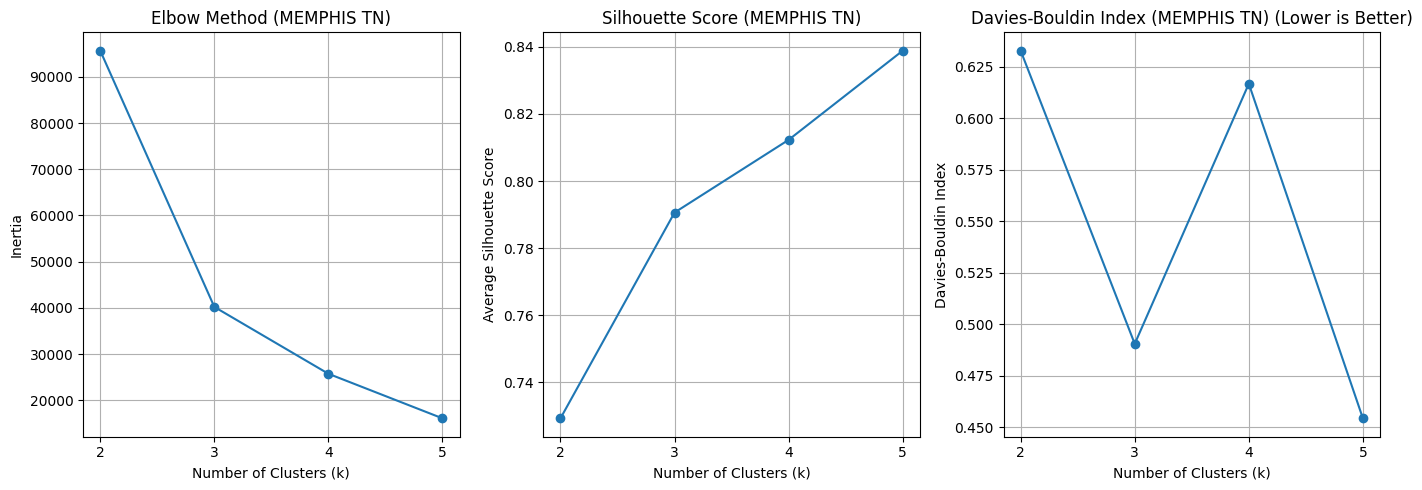

Optimal k = 5 chosen for MEMPHIS TN based on minimum positive Davies-Bouldin Index.

Applying K-Means with chosen optimal k = 5 for MEMPHIS TN

K-Means clustering completed for destination cities of MEMPHIS TN with k=5.
Added 'Destination_Cluster_Pickup' column to the DataFrame for MEMPHIS TN.


<Figure size 1500x1000 with 0 Axes>

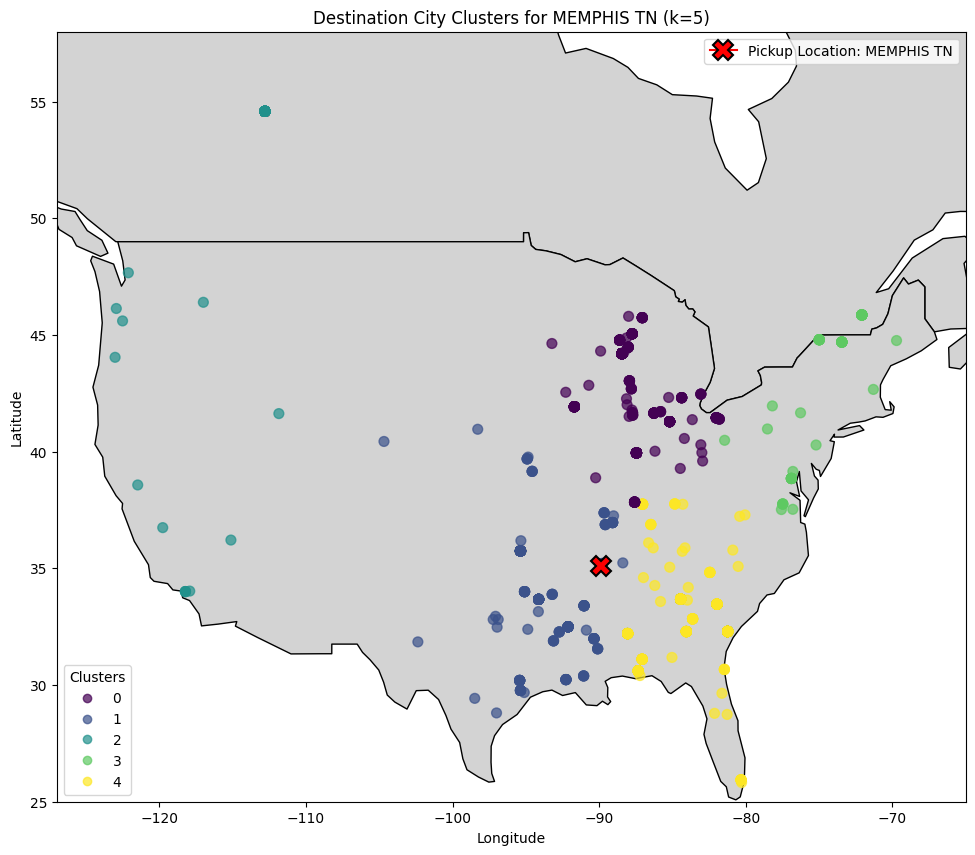


--- Processing Pick-up Location: CADET MO ---
Evaluating K-Means for different numbers of clusters for CADET MO...


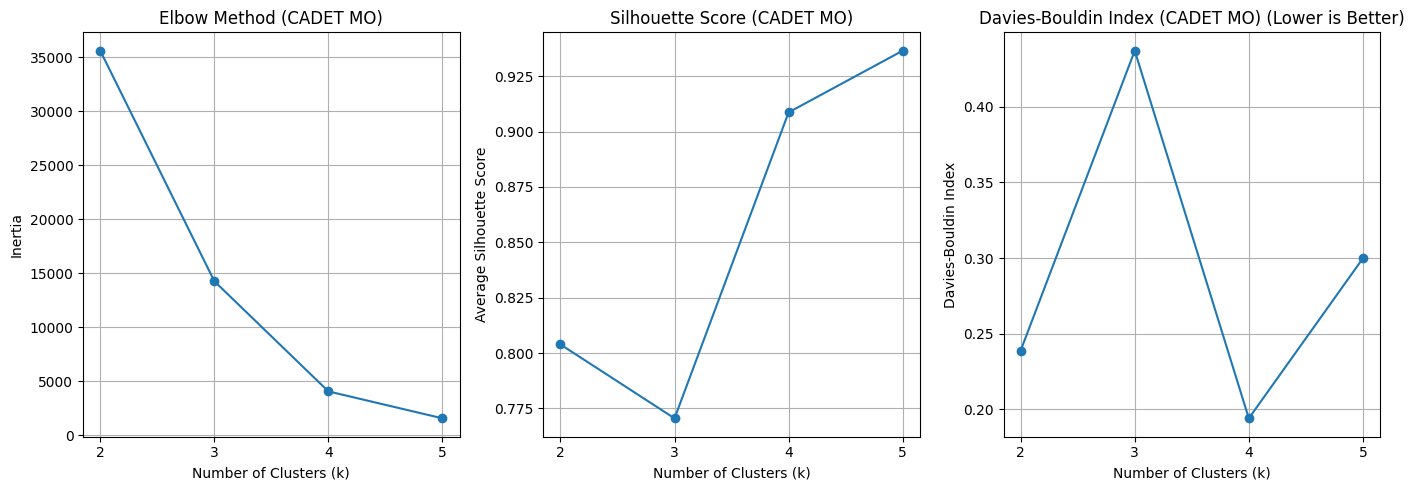

Optimal k = 4 chosen for CADET MO based on minimum positive Davies-Bouldin Index.

Applying K-Means with chosen optimal k = 4 for CADET MO

K-Means clustering completed for destination cities of CADET MO with k=4.
Added 'Destination_Cluster_Pickup' column to the DataFrame for CADET MO.


<Figure size 1500x1000 with 0 Axes>

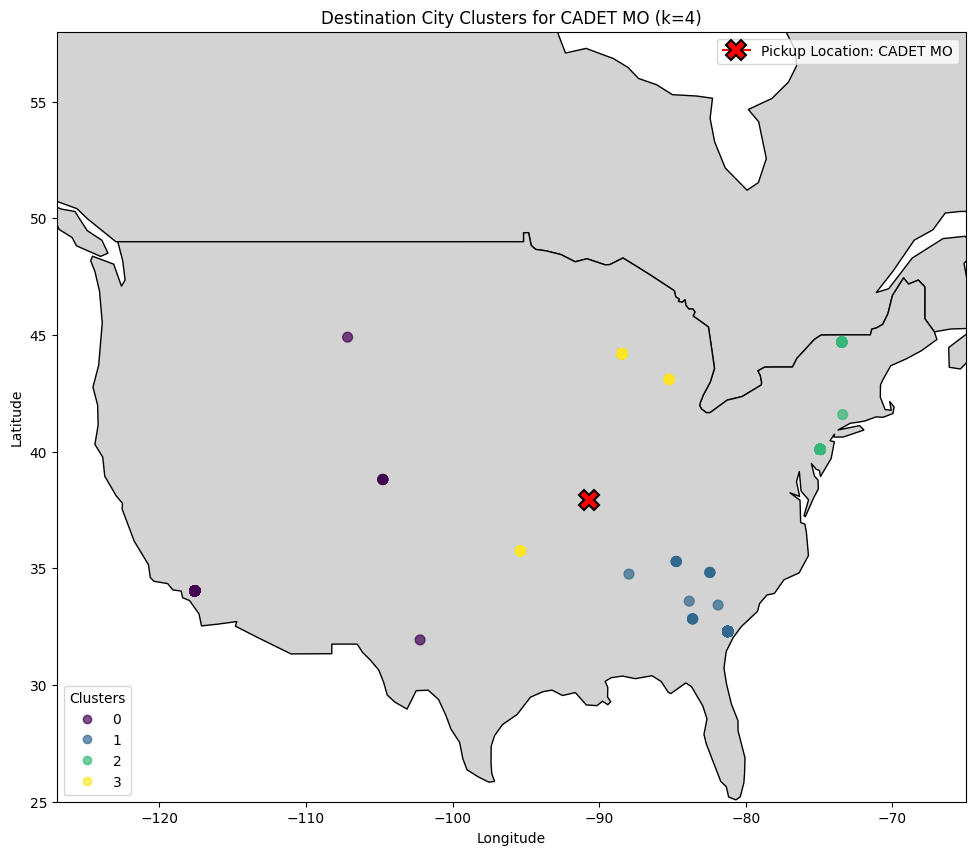


--- Processing Pick-up Location: EDMONTON AB ---
Evaluating K-Means for different numbers of clusters for EDMONTON AB...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


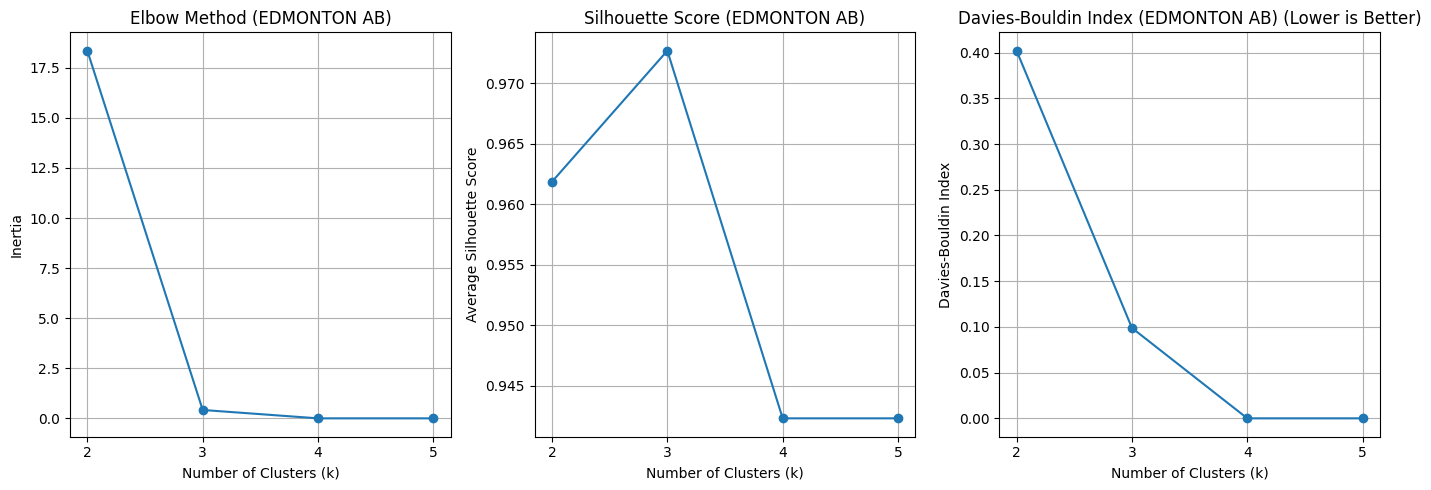

Optimal k = 3 chosen for EDMONTON AB based on minimum positive Davies-Bouldin Index.

Applying K-Means with chosen optimal k = 3 for EDMONTON AB

K-Means clustering completed for destination cities of EDMONTON AB with k=3.
Added 'Destination_Cluster_Pickup' column to the DataFrame for EDMONTON AB.


<Figure size 1500x1000 with 0 Axes>

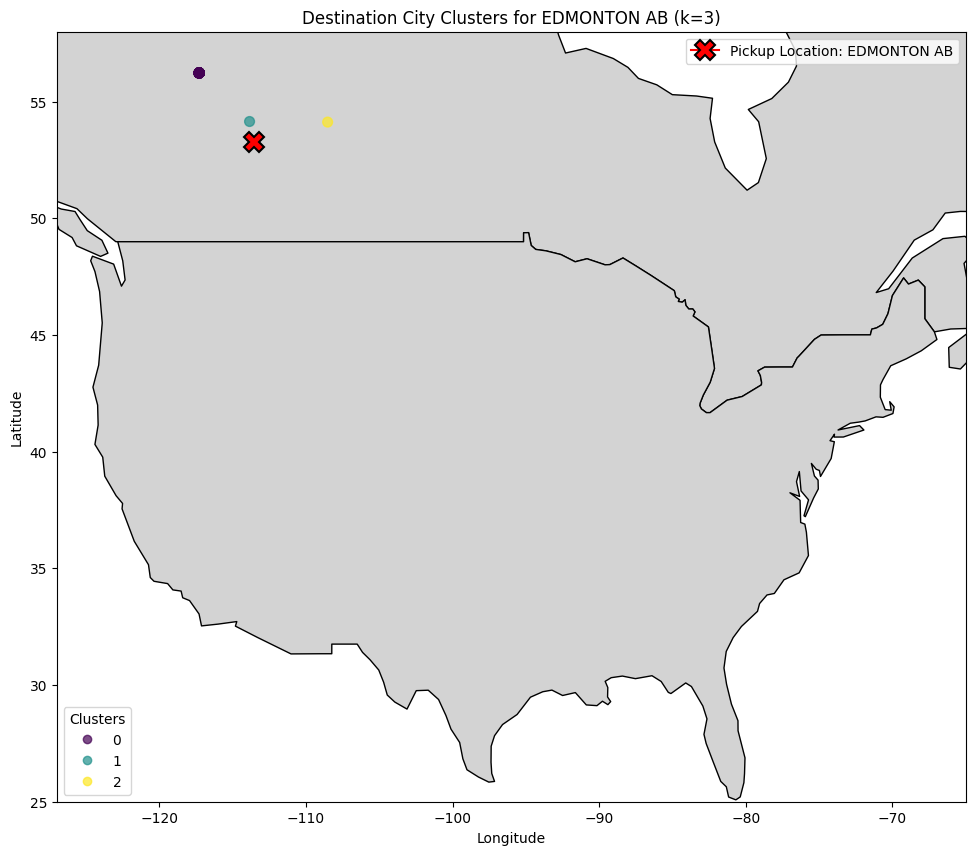


--- Processing Pick-up Location: MISSISSAUGA ON ---
Evaluating K-Means for different numbers of clusters for MISSISSAUGA ON...


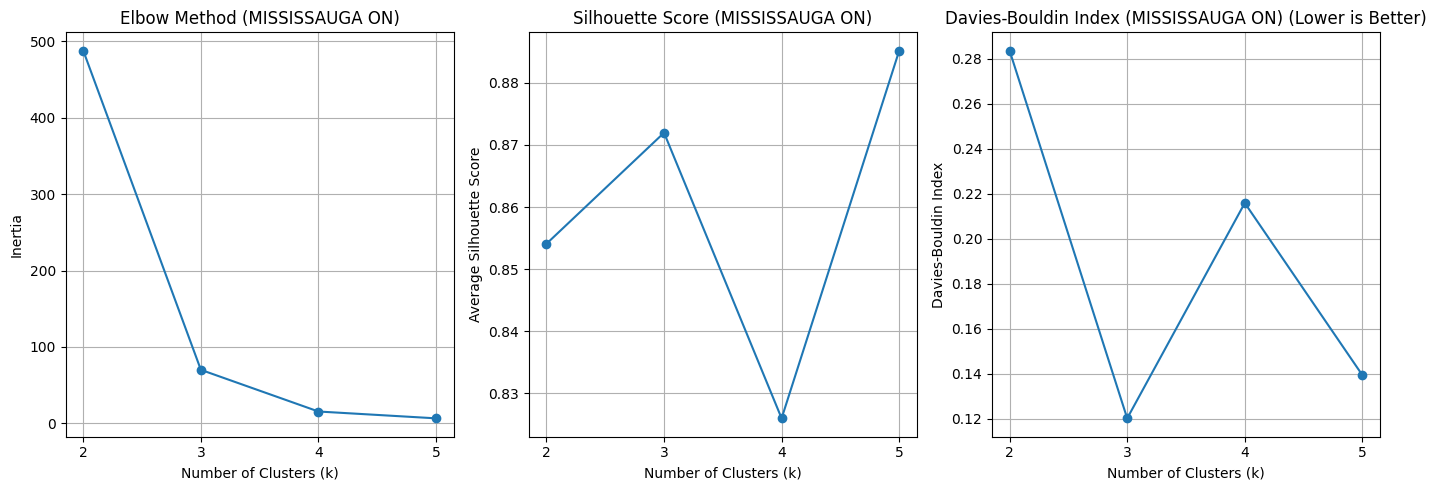

Optimal k = 3 chosen for MISSISSAUGA ON based on minimum positive Davies-Bouldin Index.

Applying K-Means with chosen optimal k = 3 for MISSISSAUGA ON

K-Means clustering completed for destination cities of MISSISSAUGA ON with k=3.
Added 'Destination_Cluster_Pickup' column to the DataFrame for MISSISSAUGA ON.


<Figure size 1500x1000 with 0 Axes>

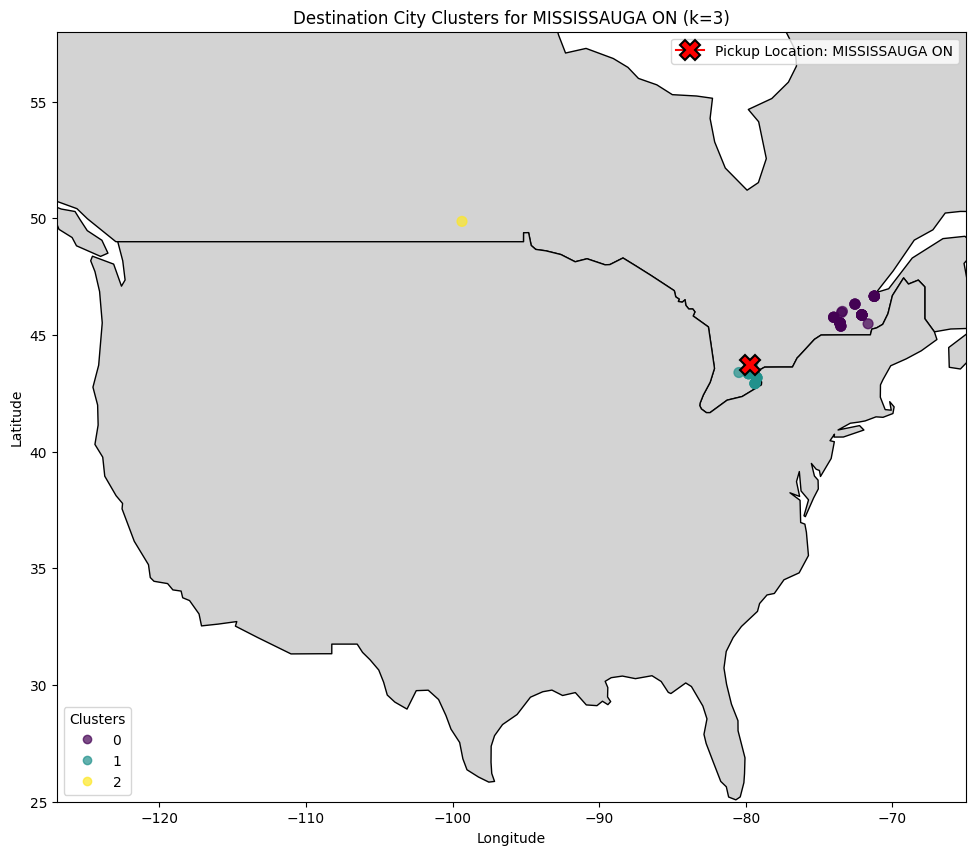


--- Processing Pick-up Location: DELTA BC ---
Evaluating K-Means for different numbers of clusters for DELTA BC...


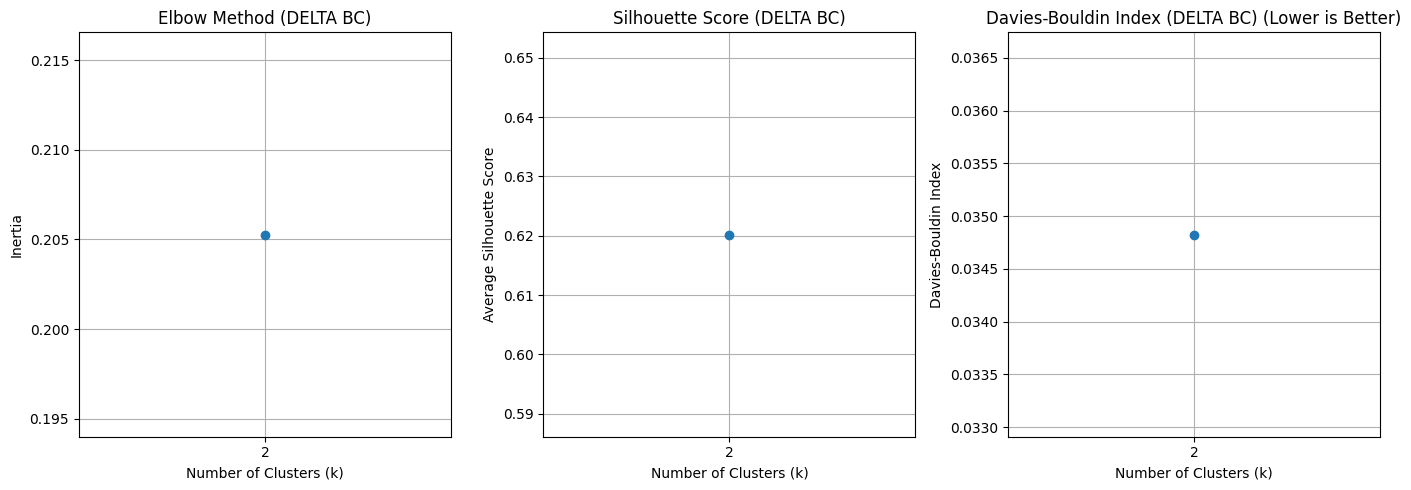

Optimal k = 2 chosen for DELTA BC based on minimum positive Davies-Bouldin Index.

Applying K-Means with chosen optimal k = 2 for DELTA BC

K-Means clustering completed for destination cities of DELTA BC with k=2.
Added 'Destination_Cluster_Pickup' column to the DataFrame for DELTA BC.


<Figure size 1500x1000 with 0 Axes>

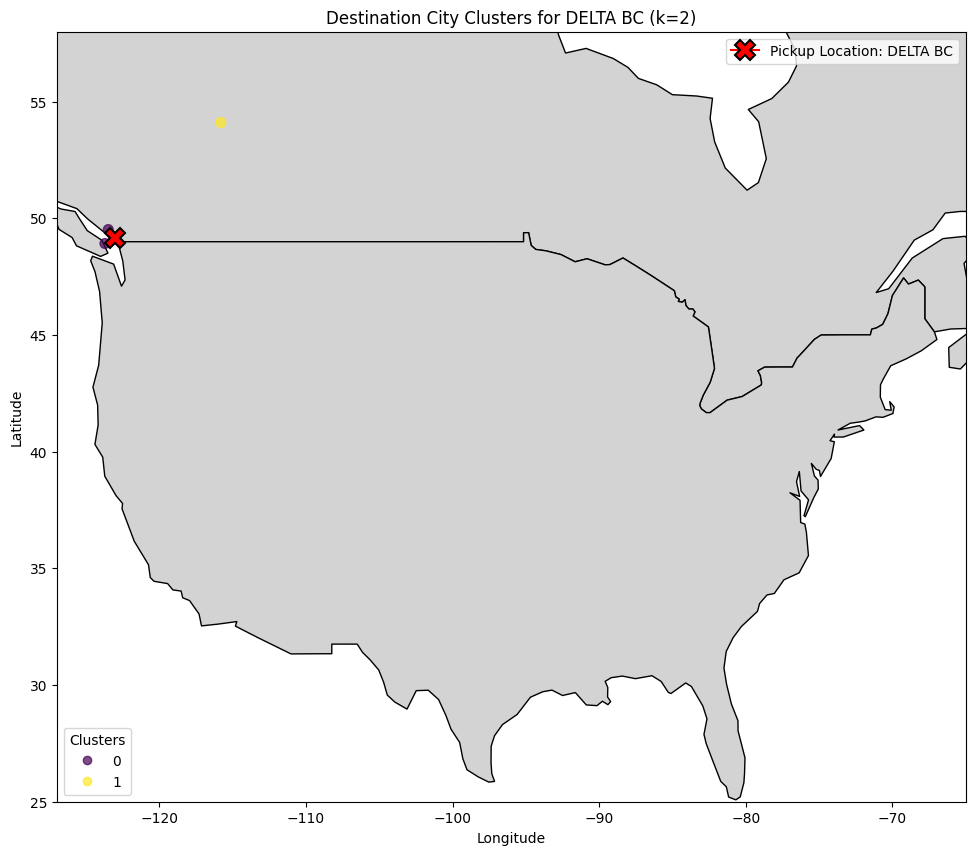


--- Processing Pick-up Location: ACHESON AB ---
Evaluating K-Means for different numbers of clusters for ACHESON AB...
Skipping inertia plot for ACHESON AB due to inconsistent list length.
No valid positive Davies-Bouldin scores found for ACHESON AB. Using default k=2.

Applying K-Means with chosen optimal k = 2 for ACHESON AB

K-Means clustering completed for destination cities of ACHESON AB with k=2.
Added 'Destination_Cluster_Pickup' column to the DataFrame for ACHESON AB.


<Figure size 1500x1000 with 0 Axes>

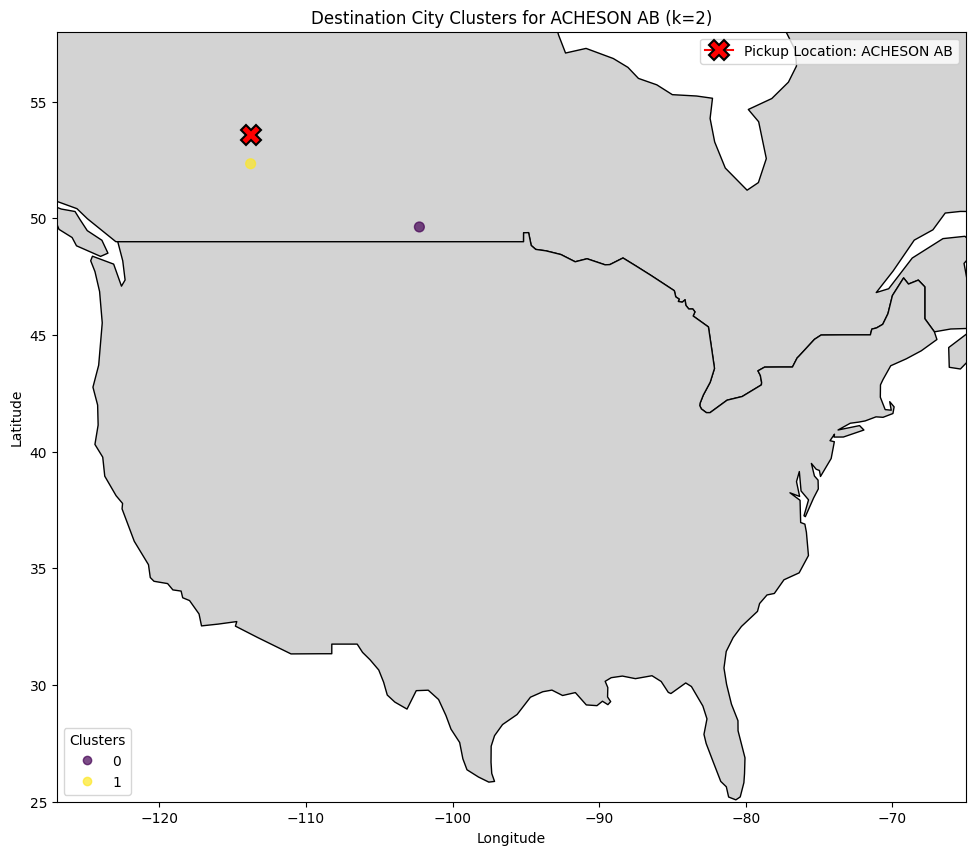


--- Clustering complete for all pickup locations ---


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd # Assuming this is already loaded from a previous cell

# Ensure required libraries are installed
# !pip install scikit-learn

# Assuming df_final is already loaded and preprocessed as in your notebook
# Assuming north_america GeoDataFrame is also loaded for plotting

# Get unique pick-up locations
unique_pickup_locations = df_final['FPCity-State Province'].unique()

# Create a dictionary to store clustering results for each pickup location
clustering_results_by_pickup = {}

# Iterate through each unique pickup location
for pickup_city in unique_pickup_locations:
    print(f"\n--- Processing Pick-up Location: {pickup_city} ---")

    # Filter the DataFrame to get deliveries from this specific pick-up location
    df_pickup = df_final[df_final['FPCity-State Province'] == pickup_city].copy()

    # Select the relevant data for clustering: Latitude and Longitude of Destination cities
    # Filter out rows with missing coordinates for destinations from this pickup
    clustering_data_pickup = df_pickup[['Lati_Des', 'Longi_Des']].dropna().copy()

    if clustering_data_pickup.empty:
        print(f"No valid destination location data available for clustering for {pickup_city}. Skipping.")
        continue

    # Determine the optimal number of clusters for this pickup location
    # You can adjust max_clusters based on the number of destinations for this pickup
    max_clusters = min(5, len(clustering_data_pickup) - 1) # Ensure at least 2 points for clustering

    if max_clusters < 1:
         print(f"Not enough distinct destination points ({len(clustering_data_pickup)}) for clustering for {pickup_city}. Skipping clustering.")
         continue

    # Initialize lists to store metrics for this pickup location
    inertia = []
    silhouette_scores = []
    davies_bouldin_scores = []

    print(f"Evaluating K-Means for different numbers of clusters for {pickup_city}...")

    # Loop starts from k=2 as metrics are not defined for k=1 or single cluster outcomes
    for k in range(2, max_clusters + 1):
        try:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(clustering_data_pickup)
            labels = kmeans.labels_
            inertia.append(kmeans.inertia_)

            # Calculate metrics for k > 1 and ensure more than one cluster was formed
            if len(np.unique(labels)) > 1 and len(labels) > 1:
                silhouette_avg = silhouette_score(clustering_data_pickup, labels)
                db_index = davies_bouldin_score(clustering_data_pickup, labels)

                silhouette_scores.append(silhouette_avg)
                davies_bouldin_scores.append(db_index)
            else:
                 # Handle cases where a cluster is empty or only one point exists after fit
                 silhouette_scores.append(-1) # or some indicator of invalid score
                 davies_bouldin_scores.append(np.inf) # Use infinity for a high DB index


        except Exception as e:
            print(f"  Error calculating metrics for k={k} for {pickup_city}: {e}")
            inertia.append(np.nan)
            silhouette_scores.append(np.nan)
            davies_bouldin_scores.append(np.nan)


    # Plotting results for metrics for this pickup location
    if inertia and len(range(2, max_clusters + 1)) == len(inertia):
        plt.figure(figsize=(14, 5))

        # Elbow Method Plot
        plt.subplot(1, 3, 1)
        plt.plot(range(2, max_clusters + 1), inertia, marker='o')
        plt.title(f'Elbow Method ({pickup_city})')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.xticks(range(2, max_clusters + 1))
        plt.grid(True)

        # Ensure metric lists have the same length as the range for k>1
        if len(range(2, max_clusters + 1)) == len(silhouette_scores) and len(range(2, max_clusters + 1)) == len(davies_bouldin_scores):
            # Silhouette Score Plot
            plt.subplot(1, 3, 2)
            plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
            plt.title(f'Silhouette Score ({pickup_city})')
            plt.xlabel('Number of Clusters (k)')
            plt.ylabel('Average Silhouette Score')
            plt.xticks(range(2, max_clusters + 1))
            plt.grid(True)

            # Davies-Bouldin Index Plot
            plt.subplot(1, 3, 3)
            plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
            plt.title(f'Davies-Bouldin Index ({pickup_city}) (Lower is Better)')
            plt.xlabel('Number of Clusters (k)')
            plt.ylabel('Davies-Bouldin Index')
            plt.xticks(range(2, max_clusters + 1))
            plt.grid(True)

            plt.tight_layout()
            plt.show()
        else:
            print(f"Skipping metric plots for {pickup_city} due to inconsistent list lengths.")

    else:
        print(f"Skipping inertia plot for {pickup_city} due to inconsistent list length.")


    # --- Choose optimal k based on Davies-Bouldin Index ---
    optimal_k_pickup = 2 # Default to the smallest valid k

    # Find the minimum Davies-Bouldin score greater than 0
    valid_db_scores = [score for score in davies_bouldin_scores if score > 0 and not np.isinf(score)]

    if valid_db_scores:
        min_db_score = min(valid_db_scores)
        # Find the index of the first occurrence of this minimum valid score
        # Need to adjust index based on the range of k used for DB scores (starts from 2)
        try:
             optimal_k_index_db = [i for i, score in enumerate(davies_bouldin_scores) if score == min_db_score][0]
             optimal_k_pickup = range(2, max_clusters + 1)[optimal_k_index_db]
             print(f"Optimal k = {optimal_k_pickup} chosen for {pickup_city} based on minimum positive Davies-Bouldin Index.")
        except IndexError:
             print(f"Could not determine optimal k based on minimum positive Davies-Bouldin Index for {pickup_city}. Using default k={optimal_k_pickup}.")

    else:
         print(f"No valid positive Davies-Bouldin scores found for {pickup_city}. Using default k={optimal_k_pickup}.")


    print(f"\nApplying K-Means with chosen optimal k = {optimal_k_pickup} for {pickup_city}")
    kmeans_pickup = KMeans(n_clusters=optimal_k_pickup, random_state=42, n_init=10)
    kmeans_pickup.fit(clustering_data_pickup)
    cluster_labels_pickup = kmeans_pickup.labels_
    cluster_centers_pickup = kmeans_pickup.cluster_centers_

    # Add the cluster labels back to the df_pickup DataFrame
    # Align labels with the original index of the filtered data
    df_pickup.loc[clustering_data_pickup.index, 'Destination_Cluster_Pickup'] = cluster_labels_pickup

    # Store the updated dataframe for this pickup location
    clustering_results_by_pickup[pickup_city] = df_pickup

    print(f"\nK-Means clustering completed for destination cities of {pickup_city} with k={optimal_k_pickup}.")
    print(f"Added 'Destination_Cluster_Pickup' column to the DataFrame for {pickup_city}.")

    # Optional: Visualize the clusters on a map for this pickup location
    plt.figure(figsize=(15, 10))
    fig, ax = plt.subplots(figsize=(15, 10)) # Create a new figure and axes for each pickup location

    # Plot North America as background
    try:
         north_america.plot(ax=ax, color='lightgrey', edgecolor='black')
    except NameError:
         print("Warning: 'north_america' GeoDataFrame not found. Plotting without background map.")


    # Plot the destination points colored by cluster for this pickup location
    scatter = ax.scatter(df_pickup['Longi_Des'], df_pickup['Lati_Des'], c=df_pickup['Destination_Cluster_Pickup'], cmap='viridis', s=50, alpha=0.7)

    # Plot the pickup location
    # Check if df_pickup is not empty before accessing iloc
    if not df_pickup.empty:
        pickup_lat = df_pickup['Lati_OC'].iloc[0] # Get pickup coords from the first row
        pickup_lon = df_pickup['Longi_OC'].iloc[0]
        ax.plot(pickup_lon, pickup_lat, marker='X', color='red', markersize=15, label=f'Pickup Location: {pickup_city}', markeredgecolor='black', markeredgewidth=1.5)
    else:
        print(f"Cannot plot pickup location as df_pickup is empty for {pickup_city}.")


    ax.set_xlim([-127, -65])  # Longitude limits
    ax.set_ylim([25, 58])    # Latitude limits
    ax.set_title(f'Destination City Clusters for {pickup_city} (k={optimal_k_pickup})')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Add legend
    legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
    ax.add_artist(legend1)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc="upper right")

    plt.show()

# Now clustering_results_by_pickup dictionary holds the clustered dataframes for each pickup location.
# For example, to access the dataframe for 'MEMPHIS TN' with its specific clusters:
# df_memphis_clustered = clustering_results_by_pickup.get('MEMPHIS TN')

print("\n--- Clustering complete for all pickup locations ---")

In [ ]:
# prompt: Now i want the final data frame after the clustering containing columns having the their corrensponding cluster no

import pandas as pd
# Combine the individual clustered dataframes back into a single DataFrame
# Use pd.concat to stack the dataframes vertically
# Ensure that the 'Destination_Cluster_Pickup' column exists in each dataframe before concatenating
final_clustered_df = pd.concat([df for df in clustering_results_by_pickup.values() if 'Destination_Cluster_Pickup' in df.columns], ignore_index=True)

print("\nFinal DataFrame after clustering by each pickup location:")
print(final_clustered_df[['City - State Province', 'FPCity-State Province', 'Destination_Cluster_Pickup']].head())

# You can now work with `final_clustered_df` which contains the original data
# along with the cluster assignment specific to the pickup location for each destination city.

# Example: Group by pickup location and destination cluster to see how many deliveries are in each specific cluster
print("\nDelivery counts per pickup location and specific destination cluster:")
print(final_clustered_df.groupby(['FPCity-State Province', 'Destination_Cluster_Pickup']).size().reset_index(name='count'))

# You can further analyze or visualize this `final_clustered_df` based on your needs.
# For example, saving the result to a CSV file:
# final_clustered_df.to_csv('final_clustered_deliveries.csv', index=False)
# print("\nFinal clustered DataFrame saved to 'final_clustered_deliveries.csv'")


Final DataFrame after clustering by each pickup location:
  City - State Province FPCity-State Province  Destination_Cluster_Pickup
0          WICKLIFFE KY            MEMPHIS TN                         1.0
1          WICKLIFFE KY            MEMPHIS TN                         1.0
2          WICKLIFFE KY            MEMPHIS TN                         1.0
3            PALATKA FL            MEMPHIS TN                         4.0
4          WICKLIFFE KY            MEMPHIS TN                         1.0

Delivery counts per pickup location and specific destination cluster:
   FPCity-State Province  Destination_Cluster_Pickup  count
0             ACHESON AB                         0.0      1
1             ACHESON AB                         1.0      1
2               CADET MO                         0.0    231
3               CADET MO                         1.0    201
4               CADET MO                         2.0    136
5               CADET MO                         3.0    233
6     

In [ ]:
final_clustered_df

,Sales Document,Plant,Collective no.,Sales Org.,Sales Doc. Type,Item,Item Category,RejectionReason,Delivery,Billing Doc.,...,City - State Province,FPCity-State Province,FPCity,Lati_Des,Longi_Des,Lati_OC,Longi_OC,Weight_Updated (Lb),Destination_Cluster,Destination_Cluster_Pickup
0,378600,US01,NaN,1030,YQOR,10,YQTN,NaN,NaN,NaN,...,WICKLIFFE KY,MEMPHIS TN,Memphis,36.964775,-89.089235,35.100177,-89.849886,10155.000,1,1.0
1,378600,US01,NaN,1030,YQOR,10,YQTN,NaN,NaN,NaN,...,WICKLIFFE KY,MEMPHIS TN,Memphis,36.964775,-89.089235,35.100177,-89.849886,10155.000,1,1.0
2,378600,US01,NaN,1030,YQOR,10,YQTN,NaN,NaN,NaN,...,WICKLIFFE KY,MEMPHIS TN,Memphis,36.964775,-89.089235,35.100177,-89.849886,10155.000,1,1.0
3,379713,US01,NaN,1030,YQOR,10,YQTN,NaN,NaN,NaN,...,PALATKA FL,MEMPHIS TN,Memphis,29.647227,-81.629711,35.100177,-89.849886,2336.000,4,4.0
4,380334,US01,NaN,1030,YQOR,10,YQTN,NaN,NaN,NaN,...,WICKLIFFE KY,MEMPHIS TN,Memphis,36.964775,-89.089235,35.100177,-89.849886,6465.000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,388413,CA02,NaN,1040,YQOR,10,YQTN,NaN,NaN,NaN,...,CHEMAINUS BC,DELTA BC,Delta,48.923300,-123.717000,49.142914,-123.007725,509.124,0,0.0
4119,389036,CA02,NaN,1040,YQOR,10,YQTN,NaN,80416100.0,NaN,...,PORT MELLON BC,DELTA BC,Delta,49.521748,-123.488059,49.142914,-123.007725,4914.920,0,0.0
4120,389050,CA02,NaN,1040,YQOR,10,YQTN,NaN,NaN,NaN,...,WHITECOURT AB,DELTA BC,Delta,54.108579,-115.808109,49.142914,-123.007725,1586.880,0,1.0
4121,389027,CA05,NaN,1040,YQOR,10,YQTN,NaN,NaN,NaN,...,CARLYLE SK,ACHESON AB,ACHESON,49.633300,-102.266700,53.559623,-113.740160,6876.480,0,0.0


In [ ]:
# # prompt: Can you convert the df_final dataframe intot the 6 differnt dataframe according to its unique pick up location

# # Get unique pickup locations
# unique_pickup_locations = df_final['FPCity-State Province'].unique()    #we can also use plant here instead of the FPCity_state Province

# # Create a dictionary to hold the dataframes for each pickup location
# dfs_by_pickup_location = {}

# # Iterate through unique pickup locations and create a separate dataframe for each
# for location in unique_pickup_locations:
#     dfs_by_pickup_location[location] = df_final[df_final['FPCity-State Province'] == location].copy()

# # You can now access the dataframes using the pickup location name as the key
# # For example, to access the dataframe for 'NEW YORK NY':
# # df_new_york = dfs_by_pickup_location['NEW YORK NY']

# # Print the keys to see the names of the generated dataframes
# print(dfs_by_pickup_location.keys())

In [ ]:
df_final

,Sales Document,Plant,Collective no.,Sales Org.,Sales Doc. Type,Item,Item Category,RejectionReason,Delivery,Billing Doc.,...,Freight Terms,City - State Province,FPCity-State Province,FPCity,Lati_Des,Longi_Des,Lati_OC,Longi_OC,Weight_Updated (Lb),Destination_Cluster
0,378600,US01,NaN,1030,YQOR,10,YQTN,NaN,NaN,NaN,...,PPA,WICKLIFFE KY,MEMPHIS TN,Memphis,36.964775,-89.089235,35.100177,-89.849886,10155.0,1
1,378600,US01,NaN,1030,YQOR,10,YQTN,NaN,NaN,NaN,...,PPA,WICKLIFFE KY,MEMPHIS TN,Memphis,36.964775,-89.089235,35.100177,-89.849886,10155.0,1
2,378600,US01,NaN,1030,YQOR,10,YQTN,NaN,NaN,NaN,...,PPA,WICKLIFFE KY,MEMPHIS TN,Memphis,36.964775,-89.089235,35.100177,-89.849886,10155.0,1
3,379282,US02,NaN,1030,YQOR,10,ZQTN,NaN,NaN,NaN,...,PPA,BELDING MI,CADET MO,Cadet,43.097809,-85.228906,37.930900,-90.705400,26182.0,5
4,379282,US02,NaN,1030,YQOR,10,ZQTN,NaN,NaN,NaN,...,PPA,BELDING MI,CADET MO,Cadet,43.097809,-85.228906,37.930900,-90.705400,26182.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,30006527,US01,NaN,1030,FD,10,KLN,NaN,NaN,NaN,...,PPD,PENNINGTON AL,MEMPHIS TN,Memphis,32.207089,-88.056129,35.100177,-89.849886,2831.0,4
4119,30006527,US01,NaN,1030,FD,10,KLN,NaN,NaN,NaN,...,PPD,PENNINGTON AL,MEMPHIS TN,Memphis,32.207089,-88.056129,35.100177,-89.849886,2831.0,4
4120,30006527,US01,NaN,1030,FD,10,KLN,NaN,NaN,NaN,...,PPD,PENNINGTON AL,MEMPHIS TN,Memphis,32.207089,-88.056129,35.100177,-89.849886,2831.0,4
4121,30006527,US01,NaN,1030,FD,10,KLN,NaN,NaN,NaN,...,PPD,PENNINGTON AL,MEMPHIS TN,Memphis,32.207089,-88.056129,35.100177,-89.849886,2831.0,4


**Now Lets Do For pick up location 'MEMPHIS TN'**
1. Lets do for this location first for testing, then we can make the pipeline easily.


In [ ]:
# df_memphis

In [ ]:
# # prompt: i want to use the k means clustering with optimal number of the cluster using the elbow method

# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Select the dataframe for 'MEMPHIS TN'
# df_memphis = dfs_by_pickup_location.get('MEMPHIS TN').copy()

# # Check if the dataframe exists and has data
# if df_memphis is not None and not df_memphis.empty:
#     # Select features for clustering (using destination coordinates)
#     X = df_memphis[['Lati_Des', 'Longi_Des']].dropna()

#     if not X.empty:
#         # Scale the data
#         scaler = StandardScaler()
#         X_scaled = scaler.fit_transform(X)

#         # Calculate Within-Cluster Sum of Squares (WCSS) for different number of clusters
#         wcss = []
#         # Try a reasonable range of cluster numbers, e.g., 1 to 10 or based on your data size
#         max_clusters = min(10, len(X)) # Do not exceed the number of data points
#         for i in range(1, max_clusters + 1):
#             kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Added n_init
#             kmeans.fit(X_scaled)
#             wcss.append(kmeans.inertia_)

#         # Plot the elbow method graph
#         plt.figure(figsize=(10, 6))
#         plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
#         plt.title('Elbow Method for Optimal Number of Clusters (MEMPHIS TN)')
#         plt.xlabel('Number of Clusters')
#         plt.ylabel('WCSS')
#         plt.xticks(range(1, max_clusters + 1))
#         plt.grid(True)
#         # plt.show()

#         print("WCSS values:", wcss)
#     else:
#         print("No valid destination coordinates available for clustering in MEMPHIS TN.")
# else:
#     print("No data found for pickup location 'MEMPHIS TN'.")

In [ ]:
# # prompt: can you also run the silouette methos for this for this

# import matplotlib.pyplot as plt
# from sklearn.metrics import silhouette_score

# # Calculate Silhouette Scores for different number of clusters
# silhouette_scores = []
# # Start from 2 clusters as silhouette score is not defined for a single cluster
# # max_clusters is defined in the previous cell
# for i in range(2, max_clusters + 1):
#     kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
#     kmeans.fit(X_scaled)
#     score = silhouette_score(X_scaled, kmeans.labels_)
#     silhouette_scores.append(score)

# # Plot the silhouette method graph
# plt.figure(figsize=(10, 6))
# plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
# plt.title('Silhouette Method for Optimal Number of Clusters (MEMPHIS TN)')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.xticks(range(2, max_clusters + 1))
# plt.grid(True)
# # plt.show()

# print("Silhouette Scores:", silhouette_scores)

In [ ]:
# # prompt: now can you generate the cluster with n numbers of the specified location "Memphis", in the map and add the clusters column in the dataframe just like below plot and also represent the pick up city location

# import matplotlib.pyplot as plt
# # Choose the optimal number of clusters based on the elbow and silhouette methods
# # Let's assume you determined the optimal number of clusters is 'n' (replace 'n' with your chosen value)
# n_clusters = 3 # Replace with the optimal number of clusters you choose

# # Ensure df_memphis and X are defined from the previous steps
# if df_memphis is not None and not df_memphis.empty and not X.empty:
#     # Perform KMeans clustering on the scaled destination coordinates
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
#     kmeans.fit(X_scaled)

#     # Add the cluster labels back to the original df_memphis dataframe
#     # Need to align the cluster labels with the original rows in df_memphis
#     # Use the index from the filtered X to ensure correct mapping
#     df_memphis.loc[X.index, 'Cluster'] = kmeans.labels_

#     # Display the first few rows with the new 'Cluster' column
#     print("DataFrame for MEMPHIS TN with Cluster column:")
#     print(df_memphis[['City - State Province', 'Lati_Des', 'Longi_Des', 'Cluster']].head())

#     # Plotting the clusters and the pickup location on the map
#     fig, ax = plt.subplots(figsize=(9, 7))

#     # Plot North America as background
#     north_america.plot(ax=ax, color='lightgrey', edgecolor='black')

#     # Plot the destination locations, colored by cluster
#     scatter = ax.scatter(df_memphis['Longi_Des'], df_memphis['Lati_Des'], c=df_memphis['Cluster'], cmap='viridis', s=50, label='Destination Clusters')

#     # Plot the pickup location (Memphis TN)
#     # Get the pickup location coordinates directly from the df_memphis DataFrame
#     # Since all rows in df_memphis are from the same pickup location, we can take the first row
#     if not df_memphis.empty:
#         pickup_lat = df_memphis['Lati_OC'].iloc[0]
#         pickup_lon = df_memphis['Longi_OC'].iloc[0]
#         ax.plot(pickup_lon, pickup_lat, marker='X', color='red', markersize=15, label=f'Pickup Location: {pickup_city}', markeredgecolor='black', markeredgewidth=1.5)
#     else:
#         print("Cannot plot pickup location as df_memphis is empty.")
#     # Add cluster centers (optional but helpful)
#     # Note: Cluster centers are in scaled space, need to inverse transform if you want true lat/lon
#     # centers_scaled = kmeans.cluster_centers_
#     # centers = scaler.inverse_transform(centers_scaled)
#     # ax.scatter(centers[:, 1], centers[:, 0], marker='*', color='black', s=200, label='Cluster Centers')


#     # Zoom in to the relevant region (adjust these values as needed or dynamically)
#     plt.xlim([-127, -65])  # Longitude limits
#     plt.ylim([25, 58])    # Latitude limits

#     plt.title(f'Destination Clusters and Pickup Location for {pickup_city}')
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')

#     # Add a legend for the clusters
#     legend1 = ax.legend(*scatter.legend_elements(),
#                         loc="lower left", title="Clusters")
#     ax.add_artist(legend1)

#     # Add legend for the pickup location
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles, labels, loc="upper right")

#     plt.show()

# else:
#     print("Could not perform clustering or plotting. Dataframe for MEMPHIS TN is missing or empty, or no valid coordinates for clustering.")



**But early deliveries (like 1st or 2nd June) are not preferred or even not allowed, because:**
1. The customer may not have space to store it early.
2. There could be inventory timing issues.
3. It may violate service-level agreements (SLAs).
4. The window is usually fixed forward from the requested delivery date.

##**GYAN**



---


In the case a LTL carrier is used, the retailer
is subject to per unit transportation costs and a specific amount of carbon emissions is generated for each unit shipped. In the case a TL carrier is used, we assume that a single truck type is available for deliveries. Furthermore, each truck has a fixed capacity and a per truck cost.

---



It is actually a chemical based comapany, so most probably it does not transport two chemical. So i belive that it will tranport only one chemical.

now i have to consider cluster made out for memphis now in each cluster i have to send the the two type of the vehicle LTL (can carry less than 18000 pound) and TL(can carry between 18000 to 45000 pound) each have their own costing. And there is also 7 days of consolidation from the starting date and you can't make the delivery for more than 4 location from a truck. Now i have made the algo to algo is:

1) considering the 7-day consolidation in a cluster, we will start from the initial date and calculate the costing (which is if weight is less than 18000 pounds, LTL will be used and its costing will be cost_LTL * total weight in pound) 2) then look for next date and calculate total weight if more than 18000 then calculate the optimal distance using the TSP problem. and then calculate the cost as cost_TL * total distance of route of TSP. 3) hence sequentially calculate the cost of the coming dates till the consolidation of the 7 days od initial date. 4) now compare the average costing of the each condition cost then take the best condition of it. 5) Then take out all the these combination, so they should not used after that. 6) Then start with next date, take the 7 days consolidation time window form there. 7) Then do the same thing again till we cover all the deliveries of that cluster

That's a well-structured approach to tackling this complex optimization problem! Your algorithm outlines a good strategy for grouping deliveries within each cluster based on weight, time windows, and vehicle capacity, and then optimizing routes for the larger (TL) shipments.

Let's break down your algorithm and consider some key aspects and potential refinements:

Your Algorithm Steps:

7-Day Consolidation Window: You're wisely using a fixed time window to group orders, which is a practical approach for logistics planning.
Initial Date Start: Starting with the earliest date within a cluster makes sense to process orders chronologically.
Weight-Based Vehicle Type: Correctly identifying LTL (< 18000 lbs) and TL (18000 - 45000 lbs) based on weight is crucial for cost calculation.
LTL Costing: Applying a per-pound cost for LTL shipments is a standard model.
TL Costing with TSP: For TL shipments (over 18000 lbs), you correctly identify the need to optimize the route using the Traveling Salesperson Problem (TSP) and then apply a per-mile cost. This is a critical step for efficiency.
Sequential Calculation within Window: Iterating through dates within the 7-day window allows you to explore different combinations and their associated costs.
Comparing and Selecting Best Condition: Comparing the "average costing of each condition" within the 7-day window is a good way to identify the most cost-effective grouping for that specific window.
Removing Used Combinations: Ensuring that deliveries assigned to a specific grouping within the window are removed for subsequent iterations prevents double-counting and ensures that all deliveries are eventually considered.
Advancing the Time Window: Shifting the 7-day window to the next available date allows you to process all deliveries within the cluster.
Key Aspects and Potential Refinements:

"Optimal Distance using the TSP problem": Solving the TSP for a set of locations is computationally expensive, especially as the number of locations increases. Since you have a constraint of "not more than 4 locations from a truck," the TSP problem size is manageable (for a limited number of stops). You'll need to use a TSP solver (like those available in scipy or specialized libraries) for this.

"Compare the average costing of the each condition cost then take the best condition of it": You'll need to define what constitutes a "condition." Is a "condition" a specific combination of deliveries within the 7-day window? How do you handle the scenario where a combination within the window doesn't reach the TL weight threshold, but adding a delivery from a later date within the window would? You might want to consider exploring different combinations of deliveries within the window that meet the weight threshold for TL, not just sequential dates.

Defining "Average Costing": How are you calculating the "average costing"? Are you averaging the cost per pound or per mile, or the total cost for the deliveries within that condition? Be clear about your cost metric.

Handling Remaining Deliveries: What happens to deliveries within the 7-day window that are not included in the "best condition" (e.g., LTL shipments or TL shipments that couldn't be combined)? Do they form separate LTL shipments, or are they carried over to the next 7-day window? You'll need a clear rule for this.

Constraint of "Not more than 4 locations from a truck": This constraint is crucial and needs to be integrated into your TSP solver. When finding the optimal route for a TL shipment, you must ensure that the resulting route includes no more than 4 stops (including the pickup location and up to 3 delivery locations).

Coding the TSP: You'll need to select a TSP solver library and implement the logic to use it within your loop when a TL shipment is identified. You'll need to provide the solver with the coordinates of the pickup location and the selected delivery locations.

Data Structures: Consider how you will efficiently manage the data, especially the "used records" and the combinations you've already processed. Using sets or flags in your dataframe can be helpful.
In summary, your algorithm provides a solid framework. The next steps involve:

Implementing the TSP solver for your TL shipments, respecting the 4-stop constraint.
Clearly defining the "conditions" and the "average costing" you are comparing within the 7-day window.

Establishing rules for handling remaining deliveries within a window that are not part of the selected "best condition."

Writing the code to execute this logic, efficiently managing the data and iterations.

This is a classic example of a vehicle routing problem with time windows and capacity constraints, and your algorithm is a good starting point for a heuristic approach to find near-optimal solutions.

##Main Model

In [ ]:
final_clustered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Sales Document              4123 non-null   int64         
 1   Plant                       4123 non-null   object        
 2   Collective no.              1230 non-null   float64       
 3   Sales Org.                  4123 non-null   int64         
 4   Sales Doc. Type             4123 non-null   object        
 5   Item                        4123 non-null   int64         
 6   Item Category               4123 non-null   object        
 7   RejectionReason             0 non-null      float64       
 8   Delivery                    366 non-null    float64       
 9   Billing Doc.                0 non-null      float64       
 10  Ship to                     4123 non-null   int64         
 11  Ship-to name                4123 non-null   object      

In [ ]:
pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.31.1 which is incompatible.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.31.1 w

In [ ]:
# # Delivery Optimization Algorithm (Greedy TL Refinement with Enhanced Combination Strategy)

# This refined code enhances the greedy-based TL formation heuristic. Within each 7-day window, high-weight orders are considered, and all valid combinations (up to 4 stops) approaching 45,000 lbs are evaluated. Additional logic ensures leftover initial-date orders are checked and potentially recombined if their collective weight justifies TL instead of LTL. Now, combinations are further filtered based on a 250 km maximum pairwise distance constraint among drop cities using a precomputed distance matrix `d_mat`, evaluated via TSP.

import pandas as pd
import numpy as np
from itertools import combinations
from datetime import timedelta
from ortools.constraint_solver import pywrapcp, routing_enums_pb2

# Constants
TL_MIN = 18000  # lbs
TL_TARGET = 30000
TL_MAX = 45000  # lbs
MAX_STOPS = 4
WINDOW_SIZE = 7
MAX_DISTANCE_KM = 250  # km

# Function to solve TSP and check max distance between drop cities

def is_tsp_feasible(combo):
    cities = [final_clustered_df.loc[idx, "City - State Province"] for idx in combo]
    n = len(cities)
    if n <= 1:
        return True

    city_indices = {city: i for i, city in enumerate(cities)}
    dist_matrix = [[0]*n for _ in range(n)]
    for i, city1 in enumerate(cities):
        for j, city2 in enumerate(cities):
            if i != j:
                dist_matrix[i][j] = d_mat.get(city1, {}).get(city2, float('inf'))

    manager = pywrapcp.RoutingIndexManager(n, 1, 0)
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return int(dist_matrix[from_node][to_node] * 1000)

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC

    solution = routing.SolveWithParameters(search_parameters)
    if not solution:
        return False

    index = routing.Start(0)
    while not routing.IsEnd(index):
        prev_index = index
        index = solution.Value(routing.NextVar(index))
        from_node = manager.IndexToNode(prev_index)
        to_node = manager.IndexToNode(index)
        dist_km = dist_matrix[from_node][to_node]
        if dist_km > MAX_DISTANCE_KM:
            return False

    return True

used_indices = set()
best_routes = []
final_clustered_df = final_clustered_df.sort_values("Request.dlv.dt")

for cluster_id in final_clustered_df['Destination_Cluster_Pickup'].unique():
    cluster_df = final_clustered_df[final_clustered_df['Destination_Cluster_Pickup'] == cluster_id].copy()
    valid_dates = cluster_df['Request.dlv.dt'].dropna()
    if valid_dates.empty:
        continue

    current_date = valid_dates.min()
    latest_date = valid_dates.max()

    while current_date <= latest_date and not cluster_df[~cluster_df.index.isin(used_indices)].empty:
        window_end = current_date + timedelta(days=WINDOW_SIZE - 1)
        window_df = cluster_df[(cluster_df['Request.dlv.dt'] >= current_date) &
                               (cluster_df['Request.dlv.dt'] <= window_end)]

        if window_df.empty:
            current_date += timedelta(days=1)
            continue

        top_orders = window_df.loc[~window_df.index.isin(used_indices)]
        top_orders = top_orders.sort_values(by='Weight_Updated (Lb)', ascending=False).head(6)
        valid_combos = []

        for r in range(1, min(MAX_STOPS + 1, len(top_orders)) + 1):
            for combo in combinations(top_orders.index, r):
                total_weight = final_clustered_df.loc[list(combo), 'Weight_Updated (Lb)'].sum()
                if len(combo) <= MAX_STOPS and total_weight <= TL_MAX and is_tsp_feasible(combo):
                    shipment_type = 'TL' if total_weight >= TL_MIN else 'LTL'
                    valid_combos.append((combo, total_weight, shipment_type))

        while valid_combos:
            best_combo, best_weight, shipment_type = sorted(valid_combos, key=lambda x: -x[1])[0]
            used_indices.update(best_combo)
            best_routes.append({
                'Cluster': cluster_id,
                'Start Date': current_date,
                'End Date': window_end,
                'Delivery Indices': best_combo,
                'Shipment Type': shipment_type,
                'Total Weight': best_weight
            })

            window_df = window_df[~window_df.index.isin(used_indices)]
            top_orders = window_df.sort_values(by='Weight_Updated (Lb)', ascending=False).head(6)
            valid_combos = []
            for r in range(1, min(MAX_STOPS + 1, len(top_orders)) + 1):
                for combo in combinations(top_orders.index, r):
                    total_weight = final_clustered_df.loc[list(combo), 'Weight_Updated (Lb)'].sum()
                    if len(combo) <= MAX_STOPS and total_weight <= TL_MAX and is_tsp_feasible(combo):
                        shipment_type = 'TL' if total_weight >= TL_MIN else 'LTL'
                        valid_combos.append((combo, total_weight, shipment_type))

        initial_date_indices = window_df[(window_df['Request.dlv.dt'] == current_date) &
                                         (~window_df.index.isin(used_indices))].index

        initial_total_weight = final_clustered_df.loc[initial_date_indices, 'Weight_Updated (Lb)'].sum()
        if not initial_date_indices.empty:
            if initial_total_weight <= TL_MIN:
                for idx in initial_date_indices:
                    weight = final_clustered_df.loc[idx, 'Weight_Updated (Lb)']
                    used_indices.add(idx)
                    best_routes.append({
                        'Cluster': cluster_id,
                        'Start Date': current_date,
                        'End Date': window_end,
                        'Delivery Indices': (idx,),
                        'Shipment Type': 'LTL',
                        'Total Weight': weight
                    })
            else:
                remaining_indices = window_df[~window_df.index.isin(used_indices)].sort_values(by='Weight_Updated (Lb)', ascending=False).index
                combined_indices = list(initial_date_indices)
                leftover_combination = list(initial_date_indices)
                for idx in remaining_indices:
                    if idx not in combined_indices:
                        combined_indices.append(idx)
                        total_weight = final_clustered_df.loc[combined_indices, 'Weight_Updated (Lb)'].sum()
                        if TL_TARGET <= total_weight <= TL_MAX and len(combined_indices) <= MAX_STOPS and is_tsp_feasible(combined_indices):
                            used_indices.update(combined_indices)
                            best_routes.append({
                                'Cluster': cluster_id,
                                'Start Date': current_date,
                                'End Date': window_end,
                                'Delivery Indices': tuple(combined_indices),
                                'Shipment Type': 'TL',
                                'Total Weight': total_weight
                            })
                            break
                        leftover_combination = combined_indices.copy()

                final_weight = final_clustered_df.loc[leftover_combination, 'Weight_Updated (Lb)'].sum()
                if leftover_combination and TL_MIN <= final_weight < TL_TARGET and len(leftover_combination) <= MAX_STOPS and is_tsp_feasible(leftover_combination):
                    used_indices.update(leftover_combination)
                    best_routes.append({
                        'Cluster': cluster_id,
                        'Start Date': current_date,
                        'End Date': window_end,
                        'Delivery Indices': tuple(leftover_combination),
                        'Shipment Type': 'TL',
                        'Total Weight': final_weight
                    })

        current_date += timedelta(days=1)

# Step 3: Final Result
best_routes_df1 = pd.DataFrame(best_routes)


In [ ]:
best_routes_df1["Shipment Type"].value_counts()

,count
Shipment Type,
TL,1311
LTL,435


In [ ]:
# prompt: Now can i get the routes of the above shipments(best conditions)

import pandas as pd
import numpy as np
from itertools import permutations

def calculate_route_distance(indices, distance_matrix, df):
    """Calculates the total distance of a route given a sequence of indices."""
    if len(indices) < 2:
        return 0.0  # No distance for a single point or empty route

    total_dist = 0.0
    # Start from the pickup location for the first stop
    pickup_city = df.loc[indices[0], "FPCity-State Province"]

    # Check if pickup location is in the distance matrix (origin)
    if pickup_city not in distance_matrix:
         # Handle cases where pickup location is not in the distance matrix
         # This could happen if df_l didn't contain the FP location.
         # You might want to raise an error, skip, or handle this case appropriately.
         print(f"Warning: Pickup location '{pickup_city}' not found in distance matrix.")
         return np.inf # Return infinity to indicate an invalid route

    current_location = pickup_city

    for i in range(len(indices)):
        dest_city = df.loc[indices[i], "City - State Province"]

        # Check if the destination city is in the distance matrix as a destination from the current location
        if current_location in distance_matrix and dest_city in distance_matrix[current_location]:
             dist = distance_matrix[current_location][dest_city]
             total_dist += dist
             current_location = dest_city # Move to the next delivery location
        else:
             # Handle cases where destination location is not in the distance matrix from the current location
             print(f"Warning: Distance between '{current_location}' and '{dest_city}' not found in distance matrix.")
             return np.inf # Indicate an invalid route

    return total_dist


def find_best_tsp_route(delivery_indices, distance_matrix, df):
    """Finds the best route (shortest distance) for a given set of delivery indices using permutations."""
    if len(delivery_indices) > MAX_STOPS:
        # This should ideally not happen due to the `MAX_STOPS` check earlier, but as a safeguard:
        print(f"Warning: Too many stops ({len(delivery_indices)}) for TSP, exceeding MAX_STOPS ({MAX_STOPS}).")
        return None, np.inf # Indicate an invalid scenario

    if len(delivery_indices) <= 1:
        return delivery_indices, 0.0 # Single stop or no stops have no route distance

    min_distance = np.inf
    best_route = None

    # The starting point is the pickup location, which is the same for all deliveries in a combo
    # The delivery locations are the stops after the pickup.
    # We need to find the optimal sequence of delivery locations.

    # Generate all permutations of the delivery indices
    for perm in permutations(delivery_indices):
        current_route_indices = list(perm)
        # Calculate the distance of this route: Pickup -> Delivery1 -> Delivery2 -> ...
        dist = calculate_route_distance(current_route_indices, distance_matrix, df)

        if dist < min_distance:
            min_distance = dist
            best_route = current_route_indices

    return best_route, min_distance


# Assuming df_final, d_mat (distance matrix dictionary), TL_MIN, TL_MAX, MAX_STOPS,
# WINDOW_SIZE are defined in the preceding code.
# Assuming final_clustered_df is the result of your previous clustering step.

# Add a column to store the calculated route distance
best_routes_df1['Route Distance (miles)'] = None
best_routes_df1['Optimal Route Indices'] = None


# Iterate through the generated routes in best_routes_df1
for index, row in best_routes_df1.iterrows():
    delivery_indices = list(row['Delivery Indices'])
    shipment_type = row['Shipment Type']

    # Only calculate TSP route for TL shipments with more than one delivery stop
    if shipment_type == 'TL' and len(delivery_indices) > 1:
        # Find the optimal permutation of delivery indices for this TL route
        # The starting point for TSP calculation should implicitly be the pickup location
        # We need to calculate distance from pickup to first stop, then between stops
        # find_best_tsp_route is modified to handle this

        optimal_route, route_distance = find_best_tsp_route(delivery_indices, d_mat, final_clustered_df)

        best_routes_df1.loc[index, 'Optimal Route Indices'] = str(optimal_route) # Store as string
        best_routes_df1.loc[index, 'Route Distance (miles)'] = route_distance
    elif shipment_type == 'LTL' or len(delivery_indices) <= 1:
         # For LTL or single-stop TL, the route is just Pickup -> Destination
         # The distance is simply the distance from pickup to the single destination
         if len(delivery_indices) == 1:
             idx = delivery_indices[0]
             pickup_city = final_clustered_df.loc[idx, "FPCity-State Province"]
             dest_city = final_clustered_df.loc[idx, "City - State Province"]
             if pickup_city in d_mat and dest_city in d_mat[pickup_city]:
                  distance = d_mat[pickup_city][dest_city]
                  best_routes_df1.loc[index, 'Optimal Route Indices'] = str(delivery_indices)
                  best_routes_df1.loc[index, 'Route Distance (miles)'] = distance
             else:
                  print(f"Warning: Distance for single stop route from '{pickup_city}' to '{dest_city}' not found.")
                  best_routes_df1.loc[index, 'Route Distance (miles)'] = np.nan # Indicate missing distance
         else: # Should not happen with the current logic but handle empty case
              best_routes_df1.loc[index, 'Route Distance (miles)'] = 0.0 # No distance for no stops


print("\nBest Routes DataFrame with Route Distances:")
print(best_routes_df1.head())

# Now you have the `best_routes_df1` DataFrame with the 'Route Distance (miles)' and
# 'Optimal Route Indices' columns calculated for the identified TL routes.
# You can use this information to calculate the cost for each route based on your defined cost model.

# Example of calculating cost (assuming a cost per mile for TL and per pound for LTL)
COST_PER_MILE_TL = 2.5 # Example cost per mile for TL
COST_PER_POUND_LTL = 0.1 # Example cost per pound for LTL

best_routes_df1['Estimated Cost'] = best_routes_df1.apply(
    lambda row: (row['Route Distance (miles)'] * COST_PER_MILE_TL) if row['Shipment Type'] == 'TL'
                else (row['Total Weight'] * COST_PER_POUND_LTL), axis=1
)

print("\nBest Routes DataFrame with Estimated Costs:")
print(best_routes_df1.head())

# To get the actual route cities for a TL shipment:
def get_route_cities(optimal_indices_str, df):
    """Retrieves the City - State Province names for a list of indices."""
    try:
        # Convert the string representation of the list back to a list of indices
        optimal_indices = eval(optimal_indices_str)
        cities = [df.loc[idx, "City - State Province"] for idx in optimal_indices]
        # Add the pickup city at the beginning
        if optimal_indices: # Ensure the list is not empty
            pickup_city = df.loc[optimal_indices[0], "FPCity-State Province"]
            cities.insert(0, pickup_city)
        return " -> ".join(cities)
    except Exception as e:
        print(f"Error getting route cities for indices '{optimal_indices_str}': {e}")
        return "Error"

best_routes_df1['Route (Cities)'] = best_routes_df1.apply(
    lambda row: get_route_cities(row['Optimal Route Indices'], final_clustered_df) if row['Shipment Type'] == 'TL'
                else f"{final_clustered_df.loc[row['Delivery Indices'][0], 'FPCity-State Province']} -> {final_clustered_df.loc[row['Delivery Indices'][0], 'City - State Province']}",
    axis=1
)

print("\nBest Routes DataFrame with Route Cities:")
print(best_routes_df1[['Cluster', 'Start Date', 'End Date', 'Shipment Type', 'Total Weight', 'Route Distance (miles)', 'Estimated Cost', 'Route (Cities)']].head())

# You can save this dataframe for further analysis or visualization
best_routes_df1.to_csv('optimal_shipment_routes.csv', index=False)
print("\nOptimal shipment routes saved to 'optimal_shipment_routes.csv'")



Best Routes DataFrame with Route Distances:
   Cluster Start Date   End Date Delivery Indices Shipment Type  Total Weight  \
0      1.0 2025-05-22 2025-05-28          (3966,)            TL       42496.0   
1      1.0 2025-05-22 2025-05-28          (3964,)            TL       42496.0   
2      1.0 2025-05-22 2025-05-28          (3965,)            TL       42496.0   
3      1.0 2025-05-22 2025-05-28          (3963,)            TL       42496.0   
4      1.0 2025-05-22 2025-05-28          (3427,)            TL       40480.0   

  Route Distance (miles) Optimal Route Indices  
0             535.294295                [3966]  
1             535.294295                [3964]  
2             535.294295                [3965]  
3             535.294295                [3963]  
4             377.525234                [3427]  

Best Routes DataFrame with Estimated Costs:
   Cluster Start Date   End Date Delivery Indices Shipment Type  Total Weight  \
0      1.0 2025-05-22 2025-05-28          (3966,

In [ ]:
best_routes_df1[['Cluster', 'Start Date', 'End Date', 'Shipment Type', 'Total Weight', 'Route Distance (miles)', 'Estimated Cost', 'Route (Cities)']]


,Cluster,Start Date,End Date,Shipment Type,Total Weight,Route Distance (miles),Estimated Cost,Route (Cities)
0,1.0,2025-05-22,2025-05-28,TL,42496.0,535.294295,1338.235738,CADET MO -> MACON GA
1,1.0,2025-05-22,2025-05-28,TL,42496.0,535.294295,1338.235738,CADET MO -> MACON GA
2,1.0,2025-05-22,2025-05-28,TL,42496.0,535.294295,1338.235738,CADET MO -> MACON GA
3,1.0,2025-05-22,2025-05-28,TL,42496.0,535.294295,1338.235738,CADET MO -> MACON GA
4,1.0,2025-05-22,2025-05-28,TL,40480.0,377.525234,943.813086,CADET MO -> CALHOUN TN
...,...,...,...,...,...,...,...,...
1741,3.0,2025-10-02,2025-10-08,TL,26182.0,458.765892,1146.914729,CADET MO -> BELDING MI
1742,3.0,2025-10-02,2025-10-08,TL,26182.0,458.765892,1146.914729,CADET MO -> BELDING MI
1743,3.0,2025-10-02,2025-10-08,TL,26182.0,458.765892,1146.914729,CADET MO -> BELDING MI
1744,3.0,2025-10-02,2025-10-08,TL,26182.0,458.765892,1146.914729,CADET MO -> BELDING MI


THANK YOU